<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Count-plots" data-toc-modified-id="Count-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Count plots</a></span></li><li><span><a href="#Correlation-for-Continuous-Variables" data-toc-modified-id="Correlation-for-Continuous-Variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation for Continuous Variables</a></span></li><li><span><a href="#Continuous-Variables" data-toc-modified-id="Continuous-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Continuous Variables</a></span></li></ul></div>

# Description
[The Allstate Corporation](https://www.allstate.com/) is an American insurance company that is in the United States. The company also has personal lines insurance operations in Canada. 

**Data Source**
Kaggle: https://www.kaggle.com/c/allstate-claims-severity/data

# Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100
np.random.seed(SEED)

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.1'), ('pandas', '1.0.1'), ('seaborn', '0.9.0')]

In [65]:
%load_ext autoreload
%autoreload 2

In [66]:
from bhishan import bp

# Load the data

In [5]:
df_train_raw = pd.read_csv('../data/raw/train.csv')
df_test_raw = pd.read_csv('../data/raw/test.csv')


print(df_train_raw.shape)
df_train_raw.head(2)

(188318, 132)


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  

[2 rows x 132 columns]

# Count plots

In [10]:
cols_cat = [i for i in df_train_raw.columns
            if i.startswith('cat')]
len(cols_cat)

116

In [14]:
n_cols = 4
n_rows = len(cols_cat)//4

In [16]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


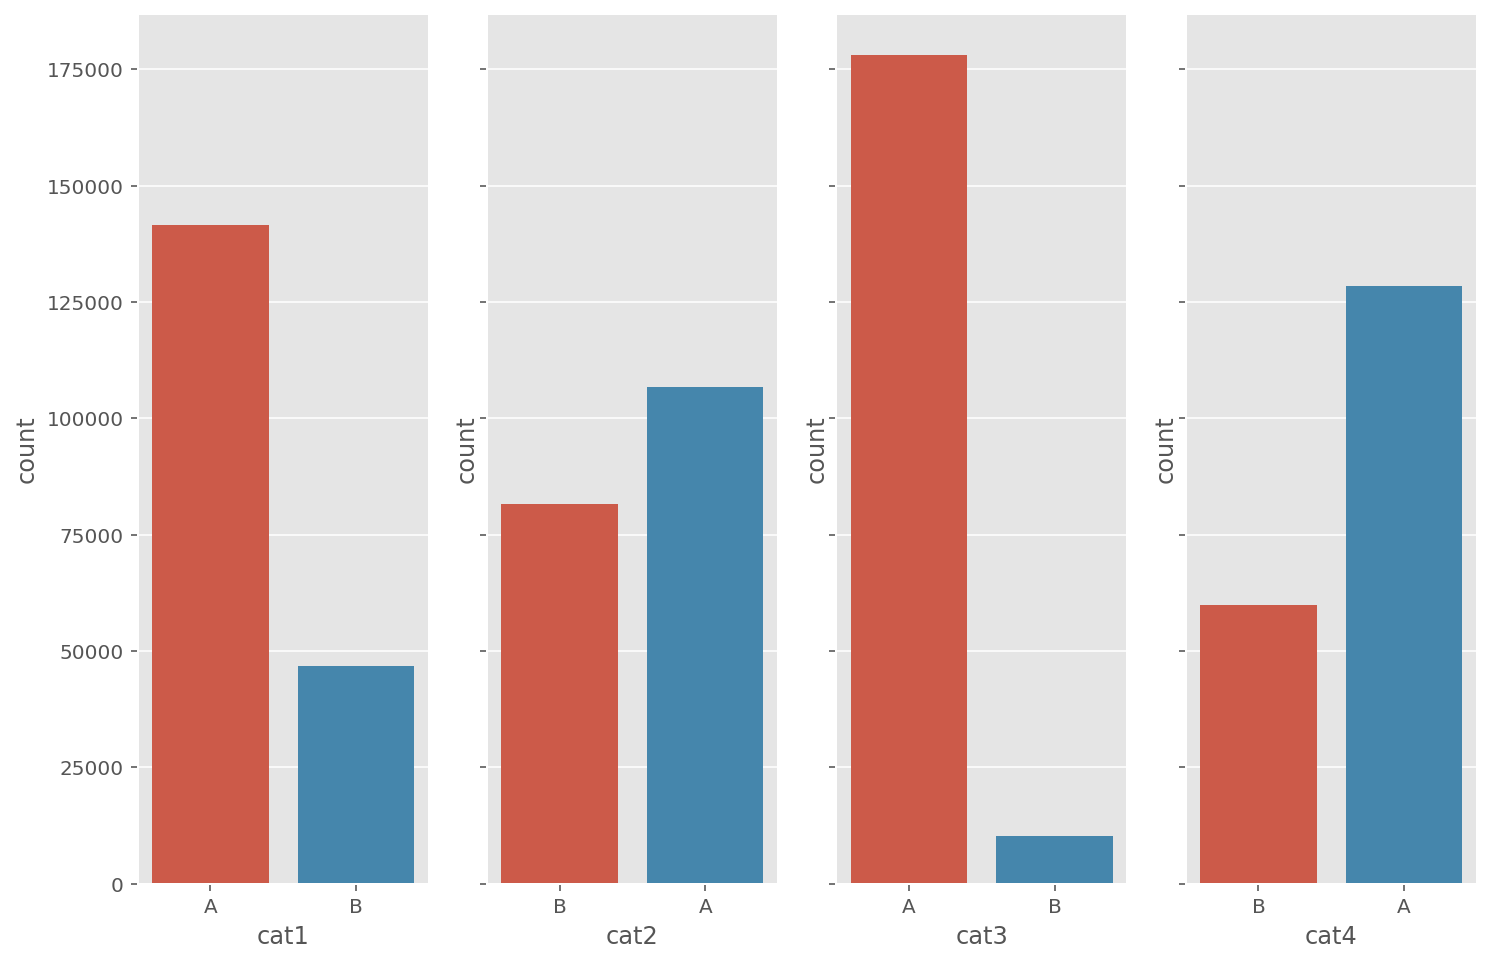

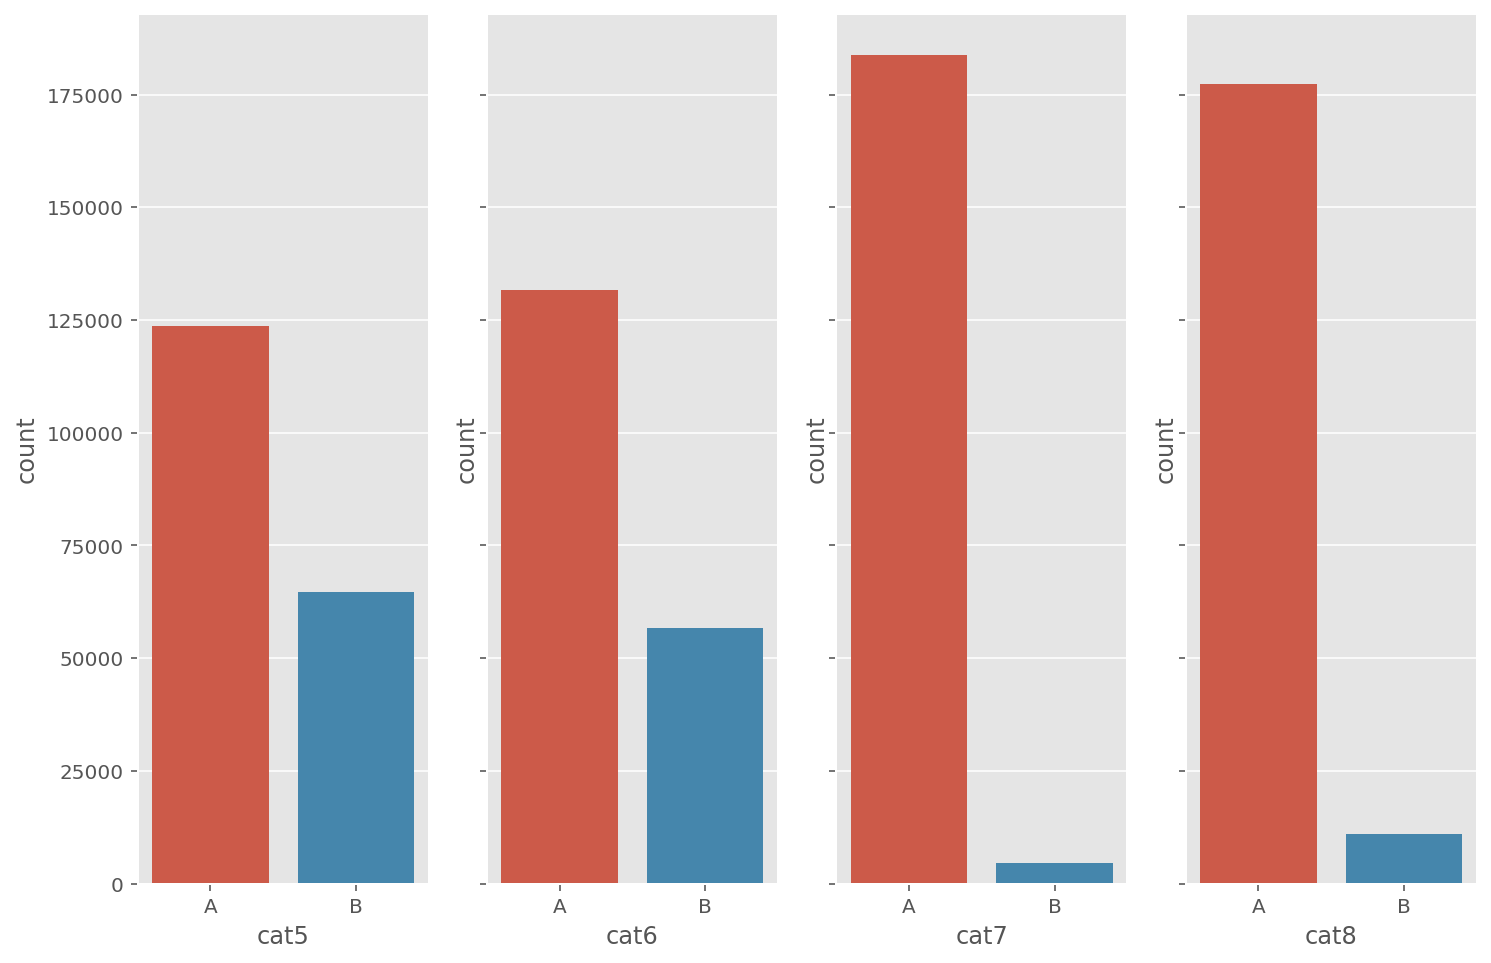

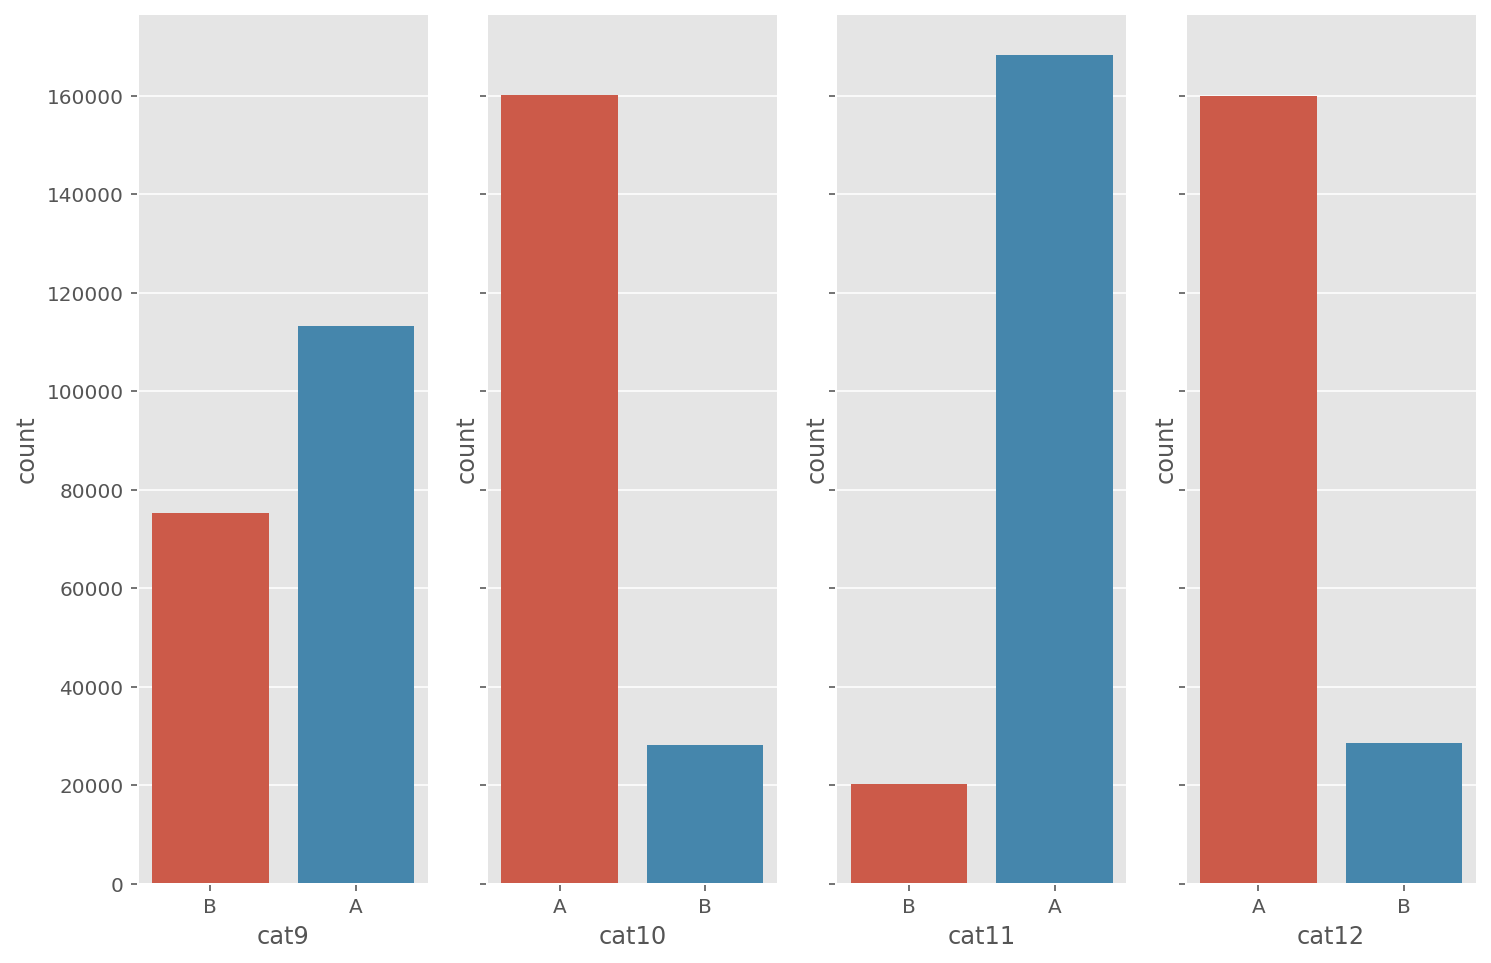

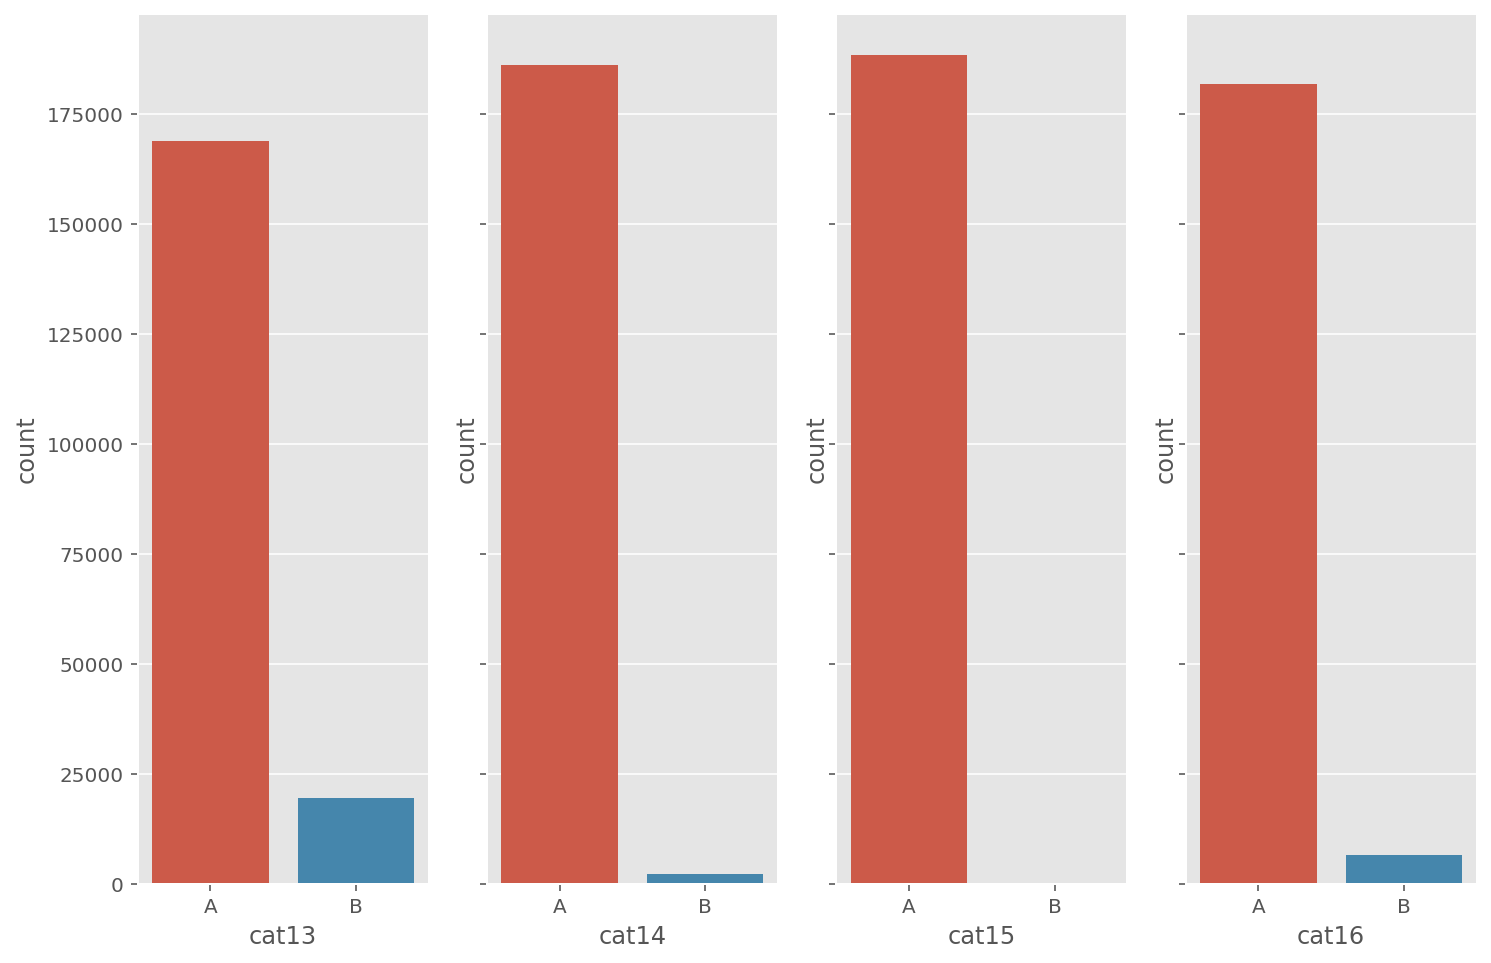

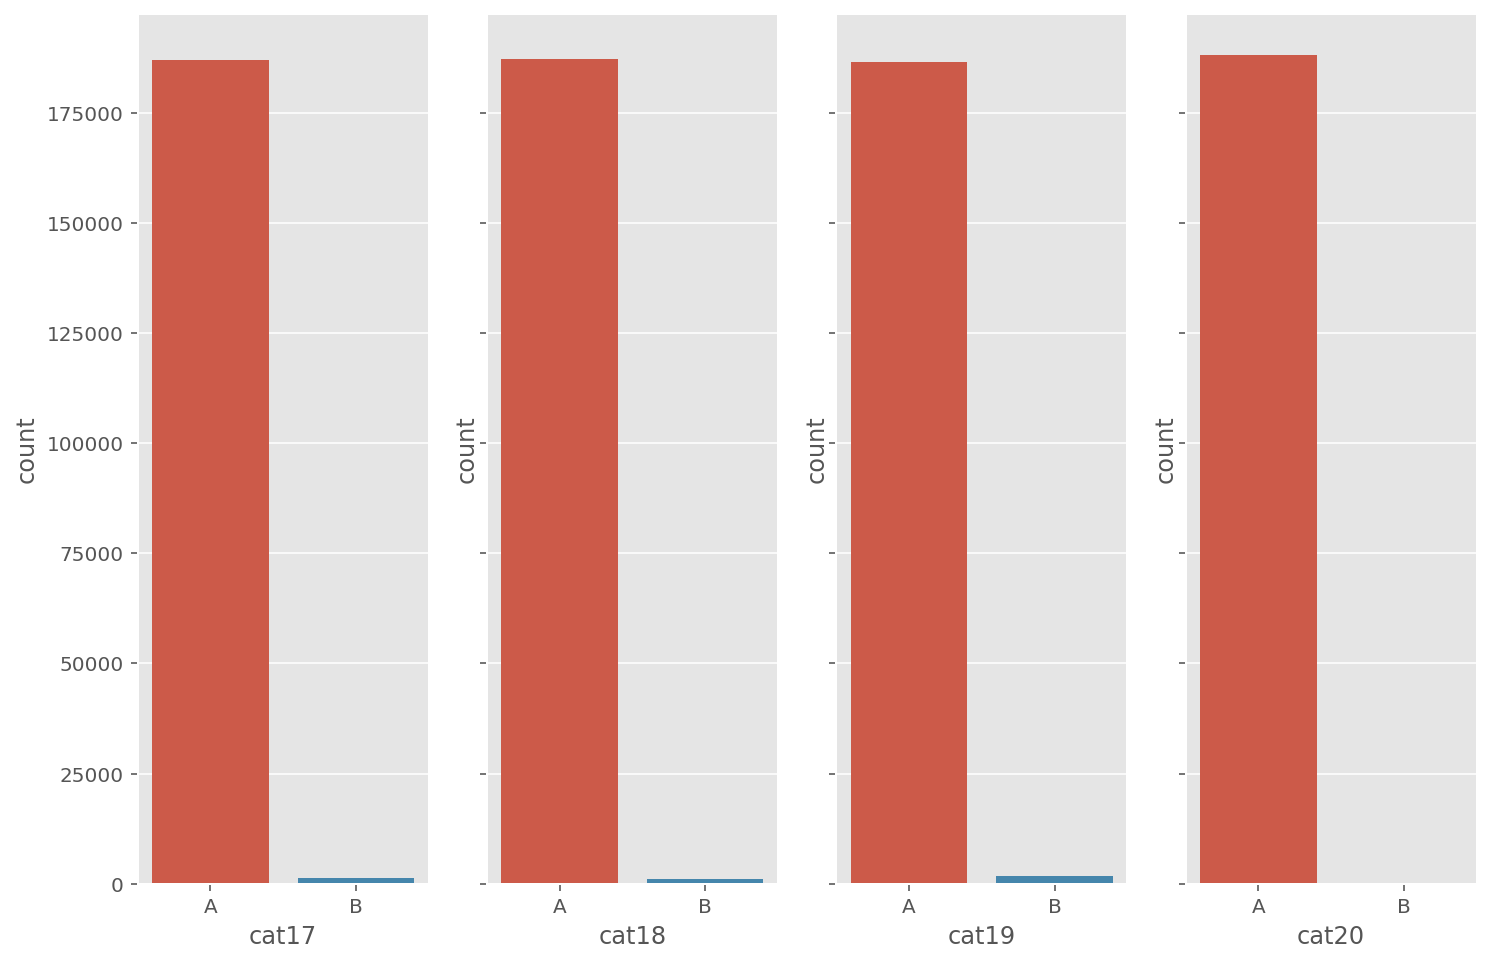

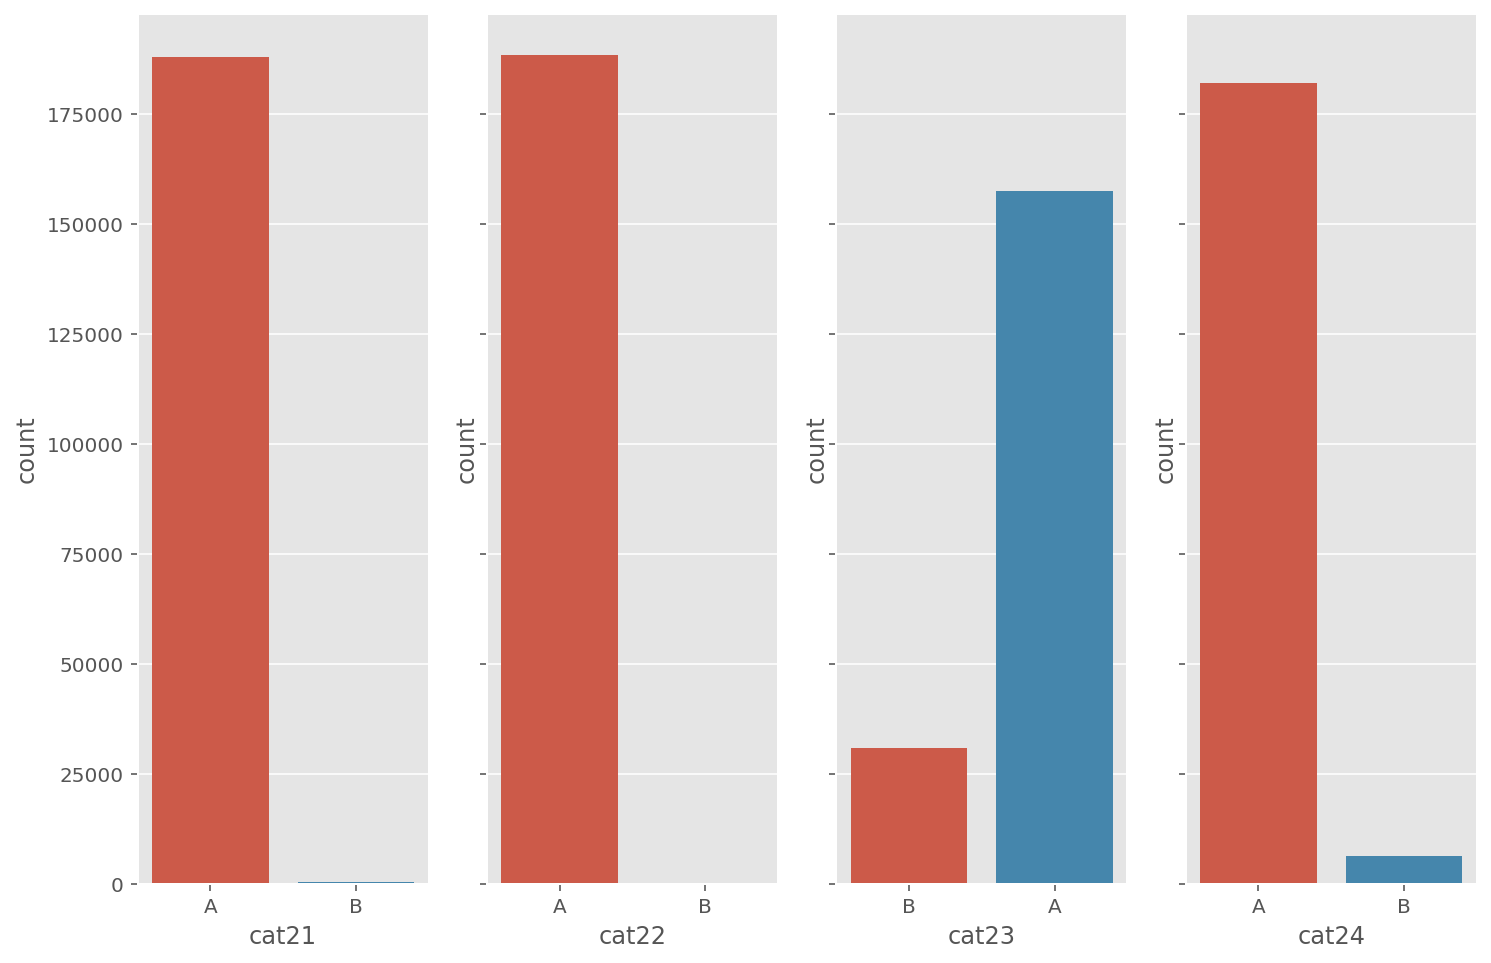

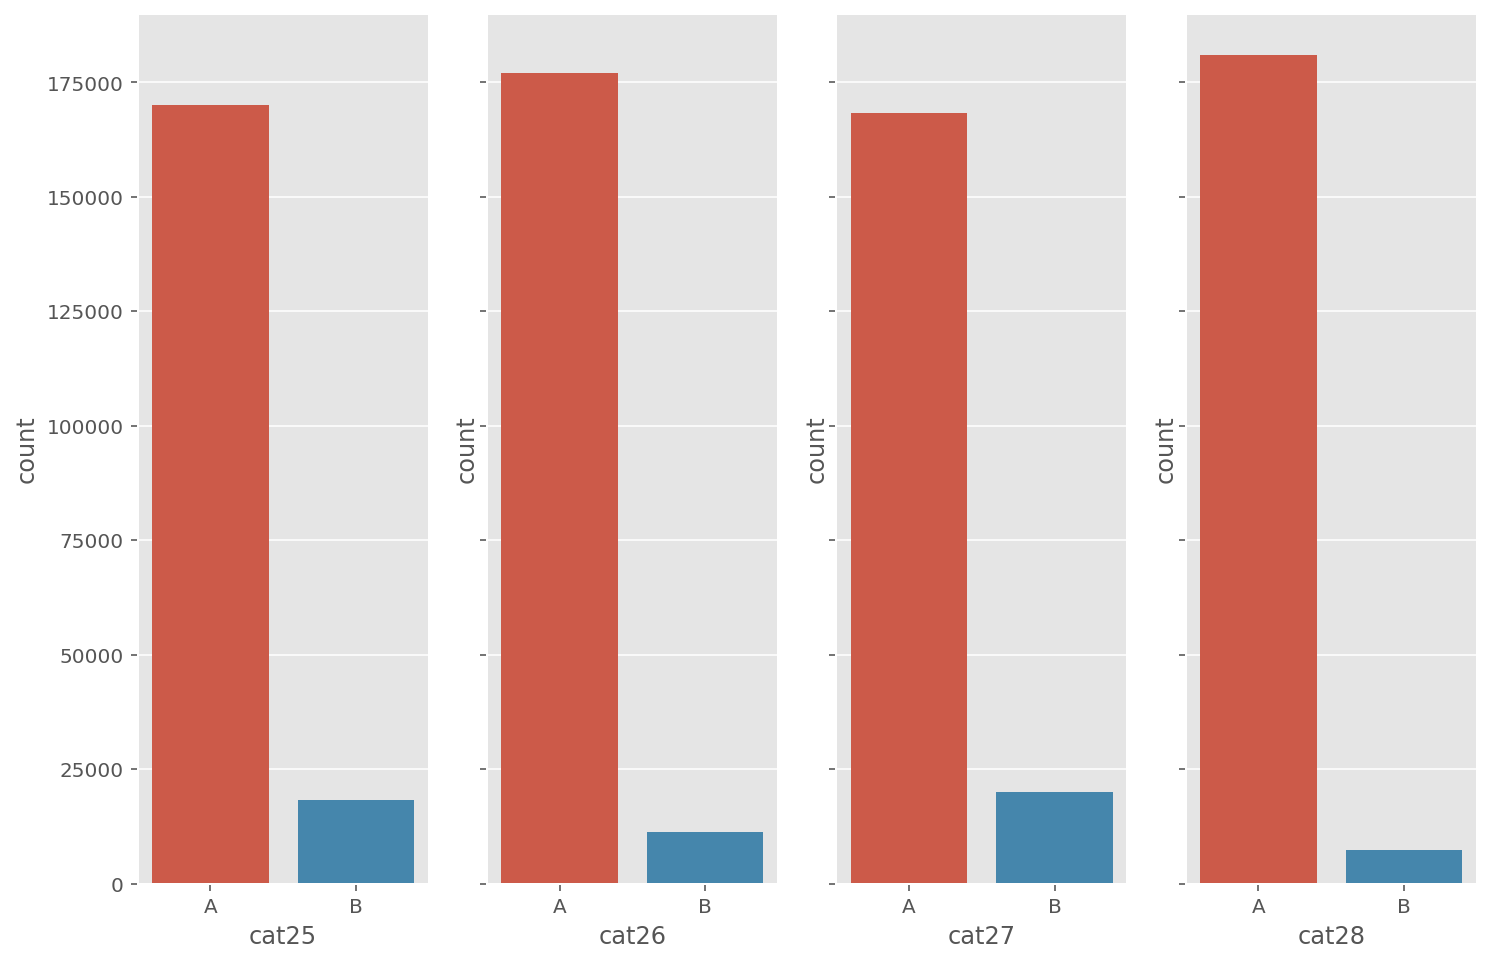

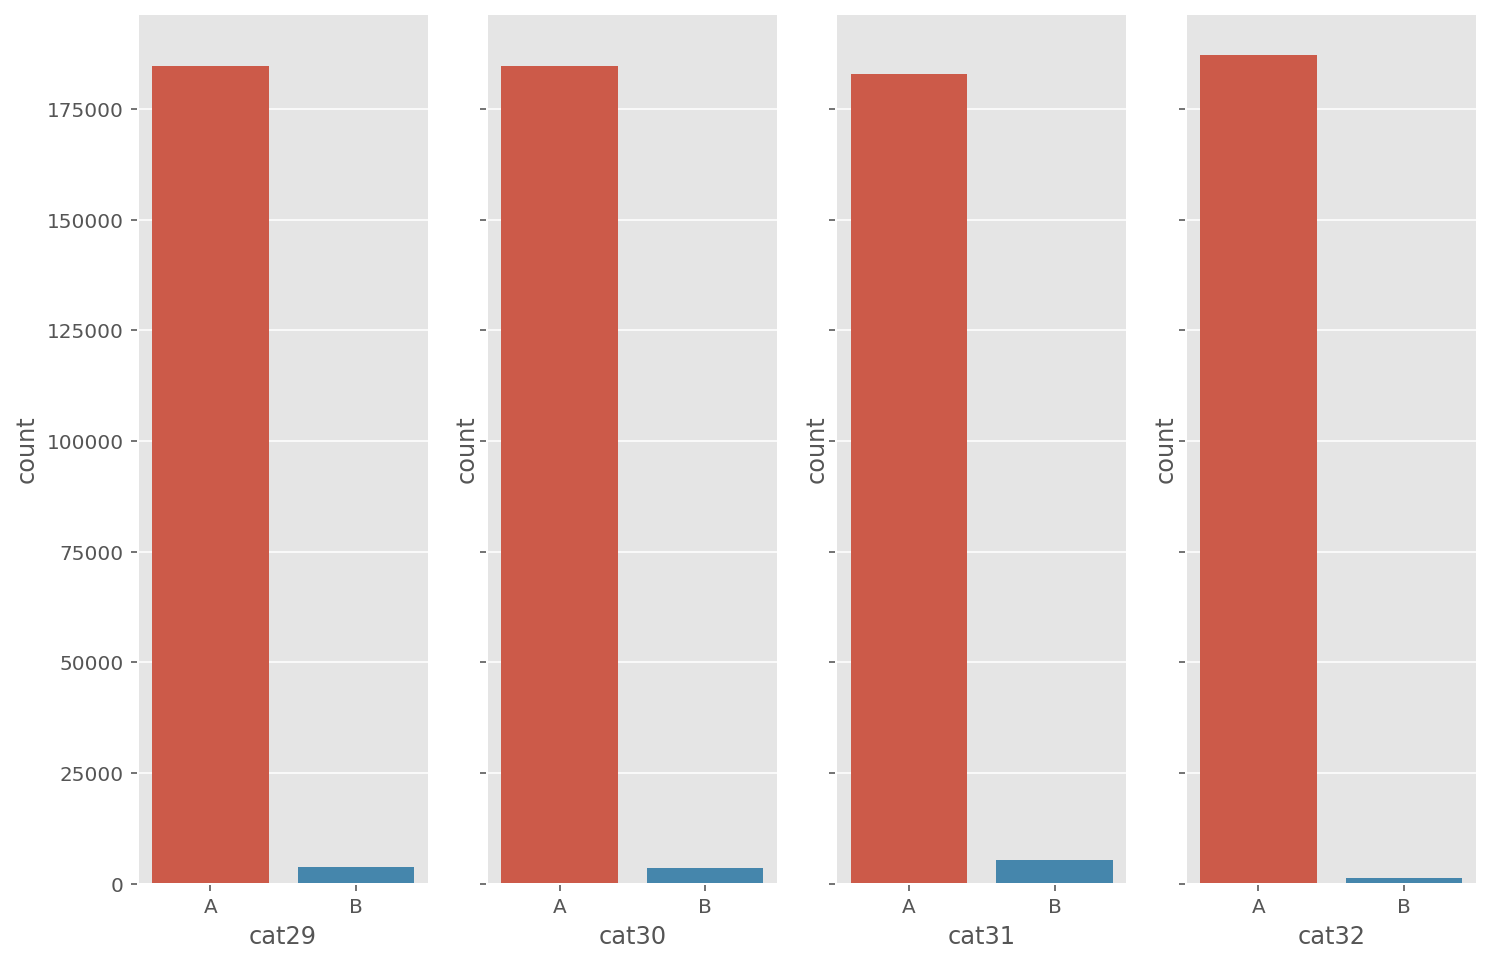

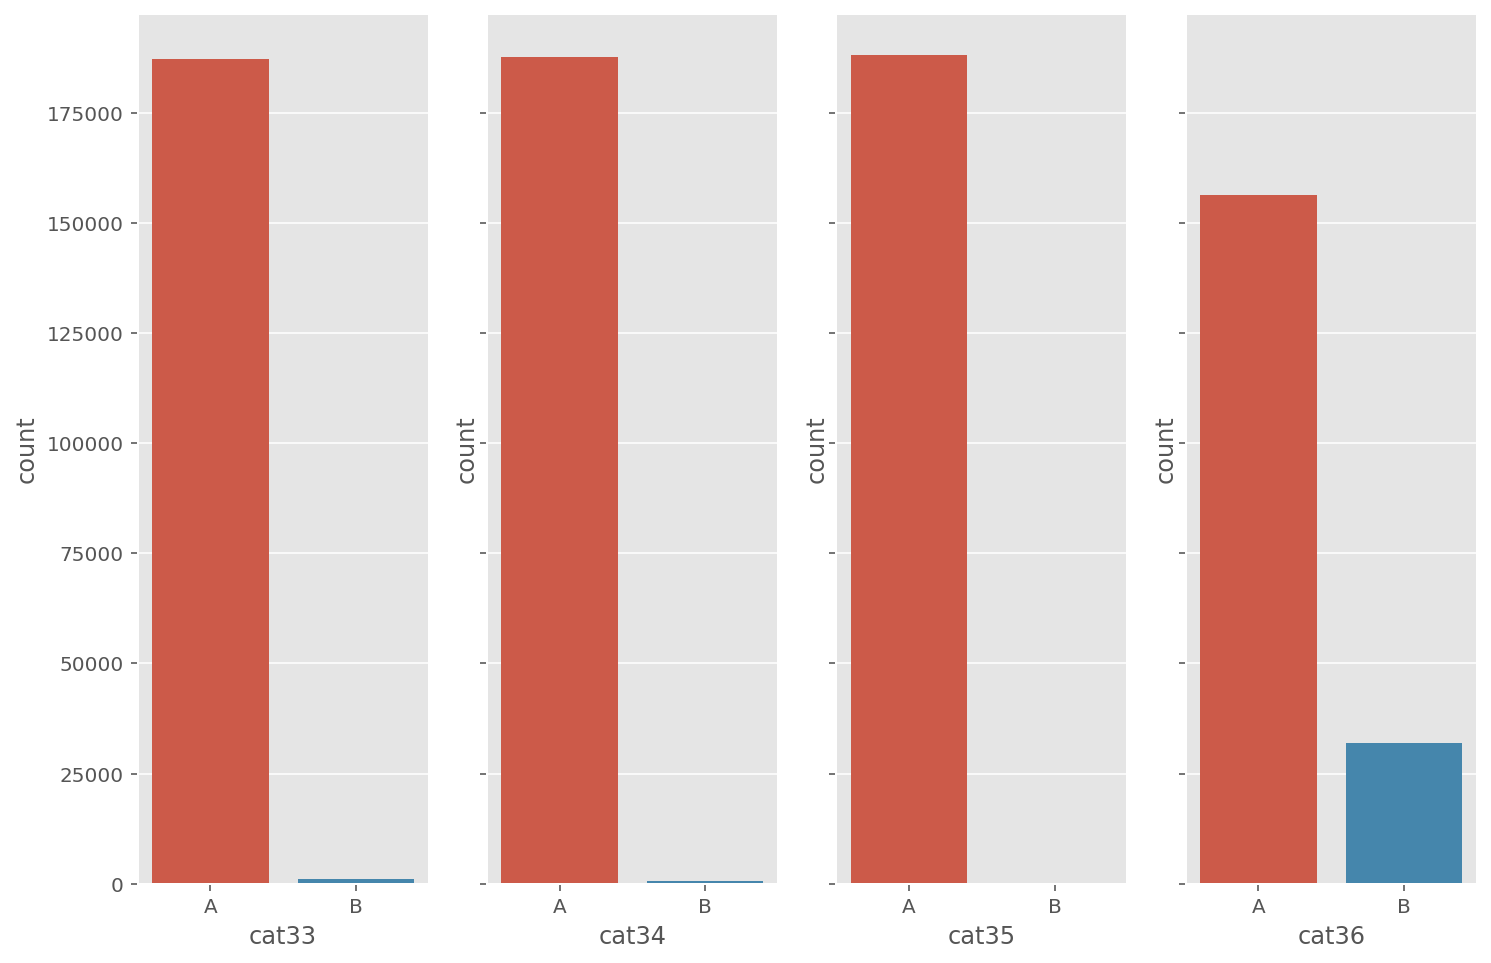

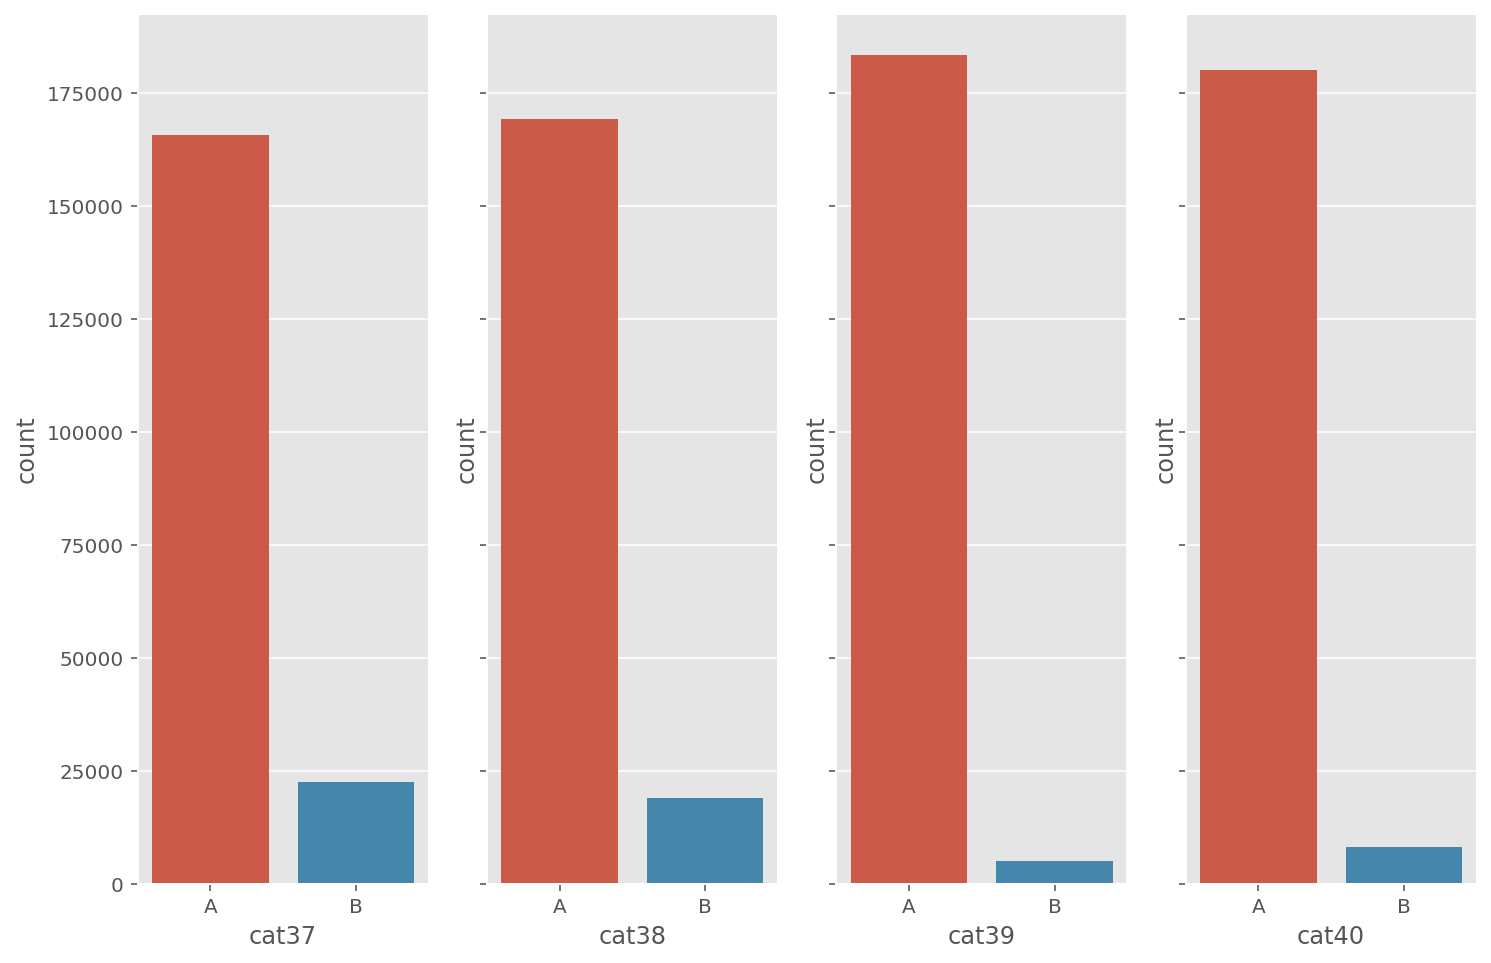

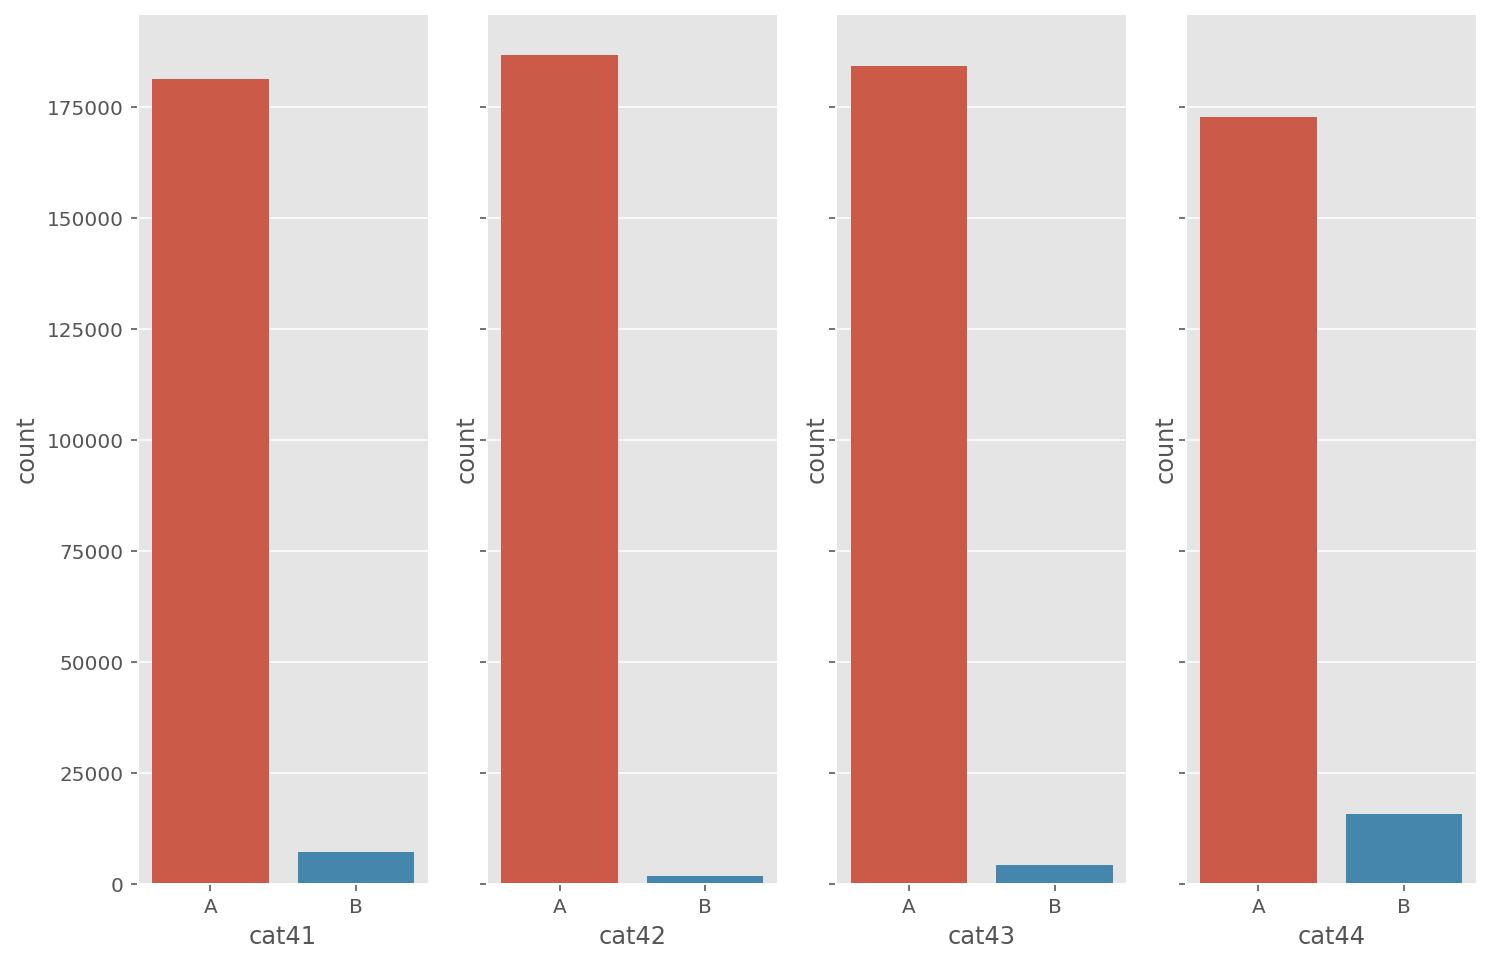

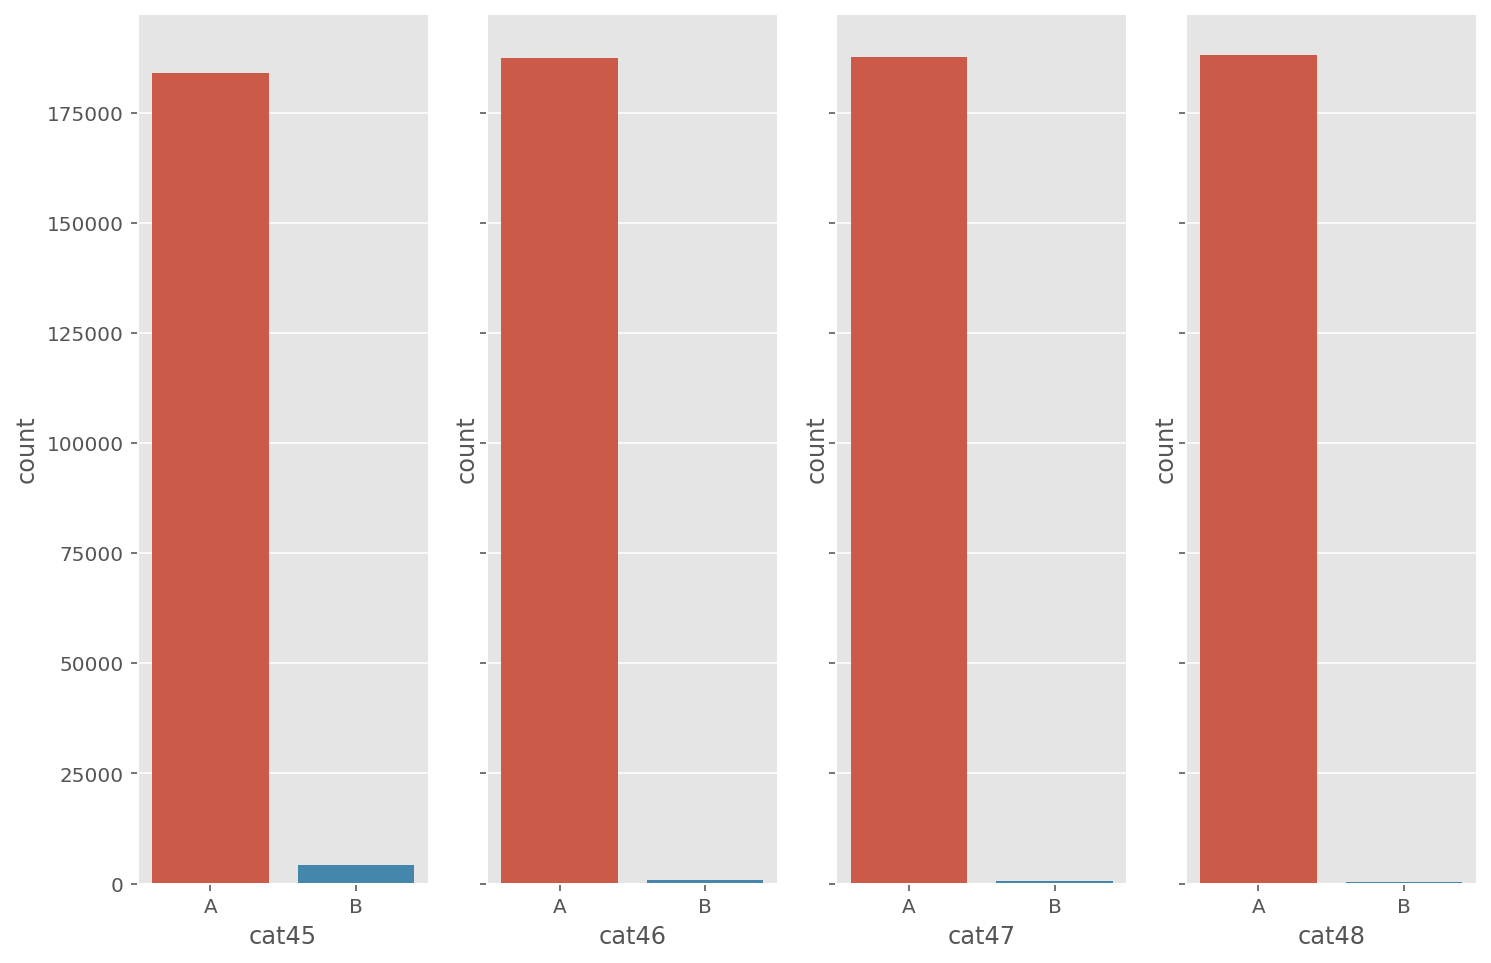

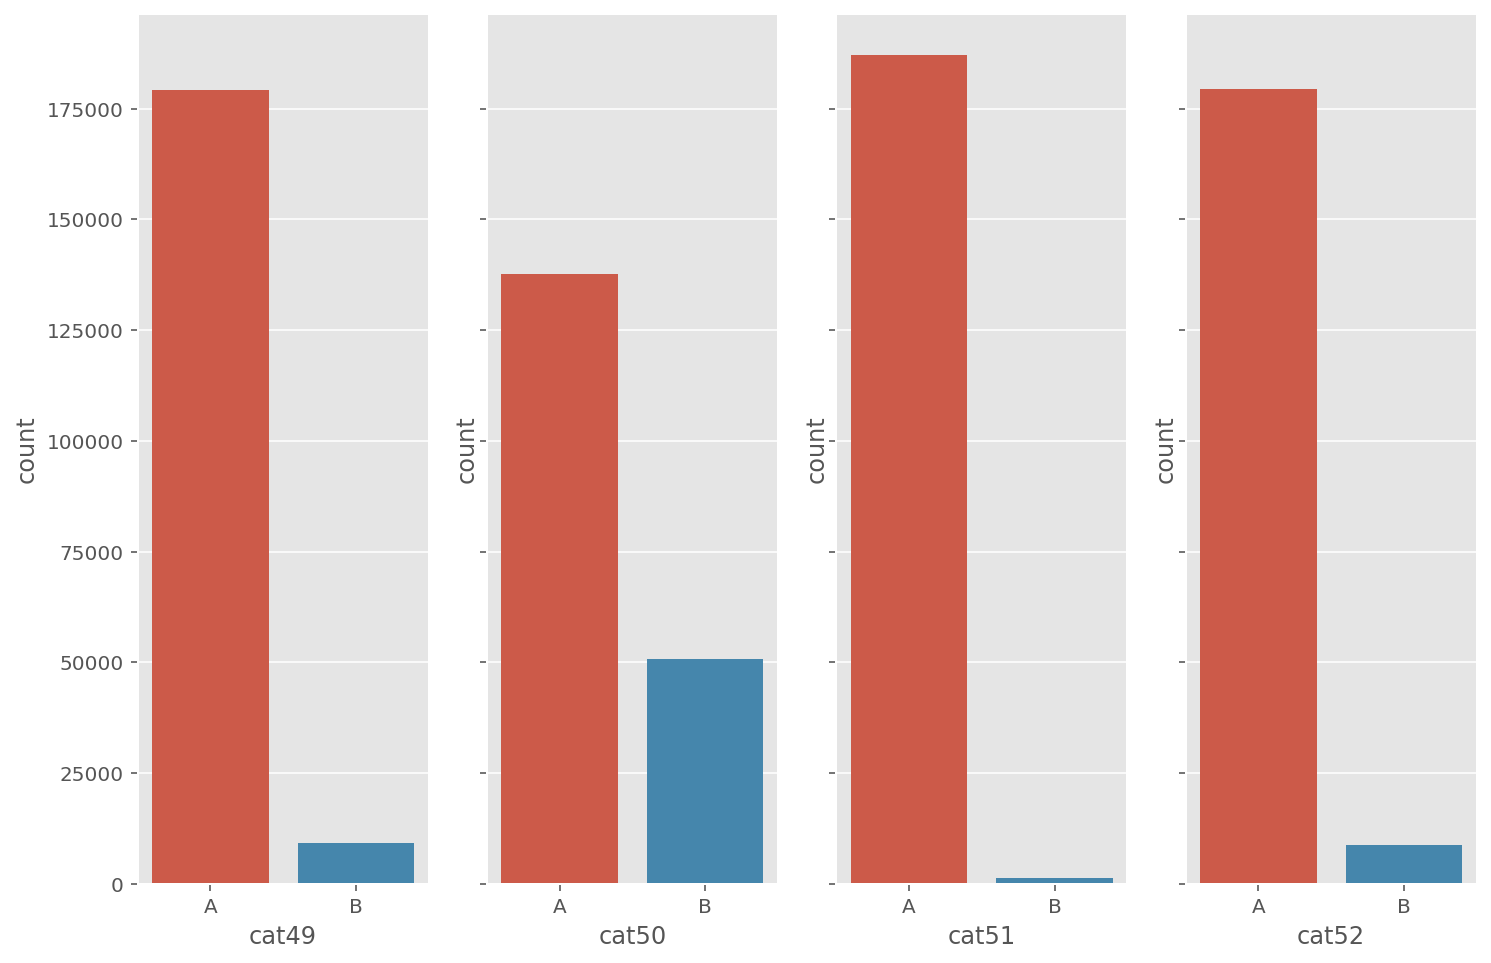

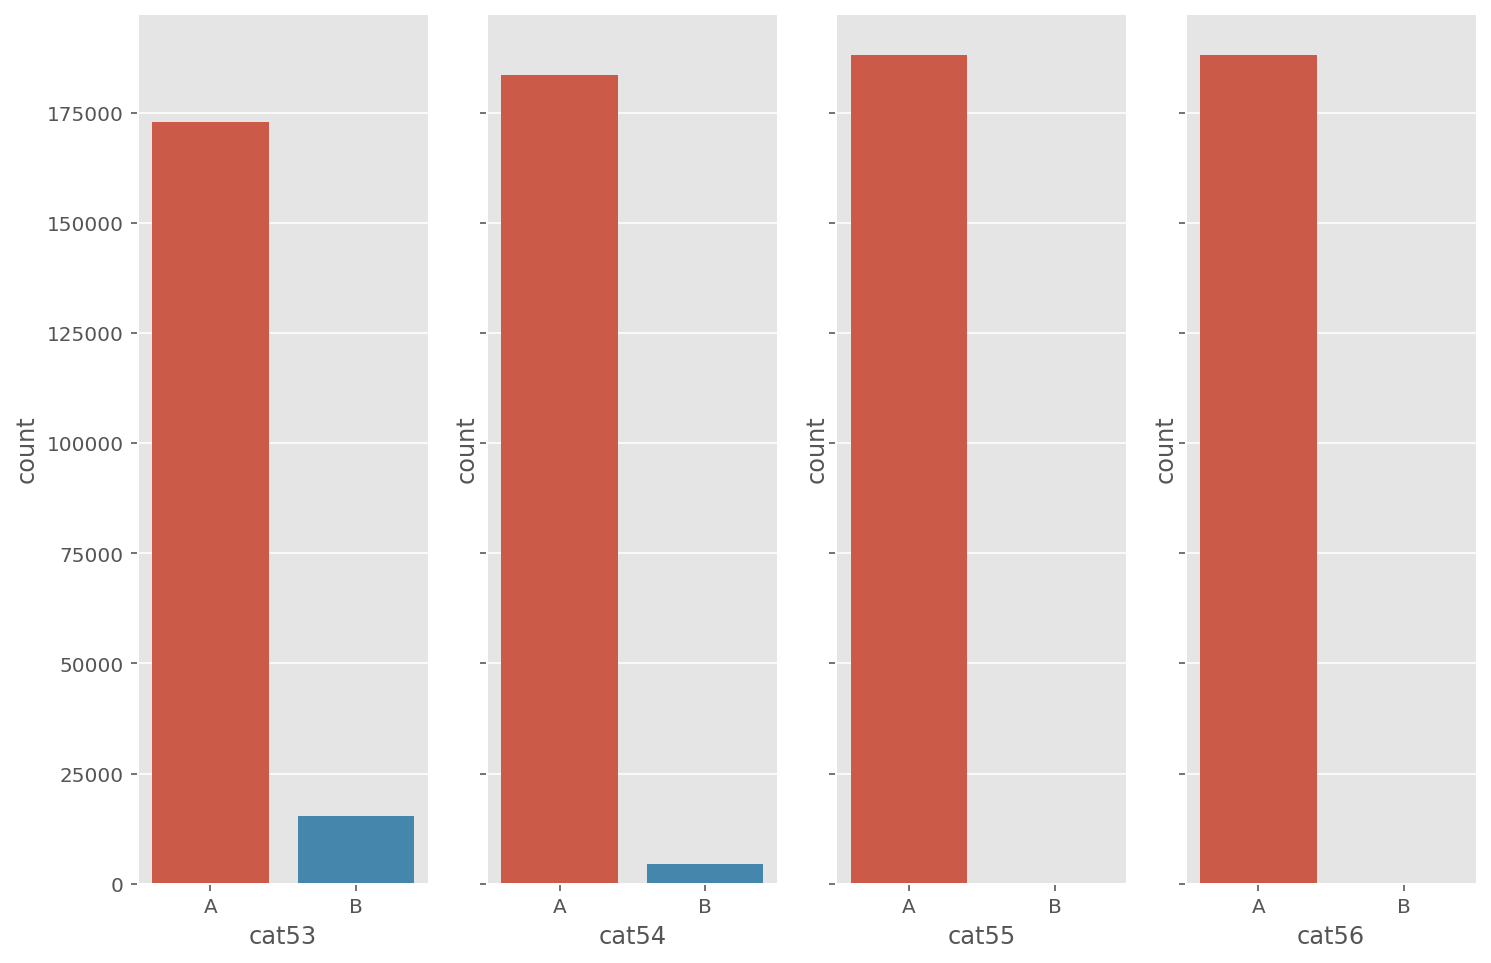

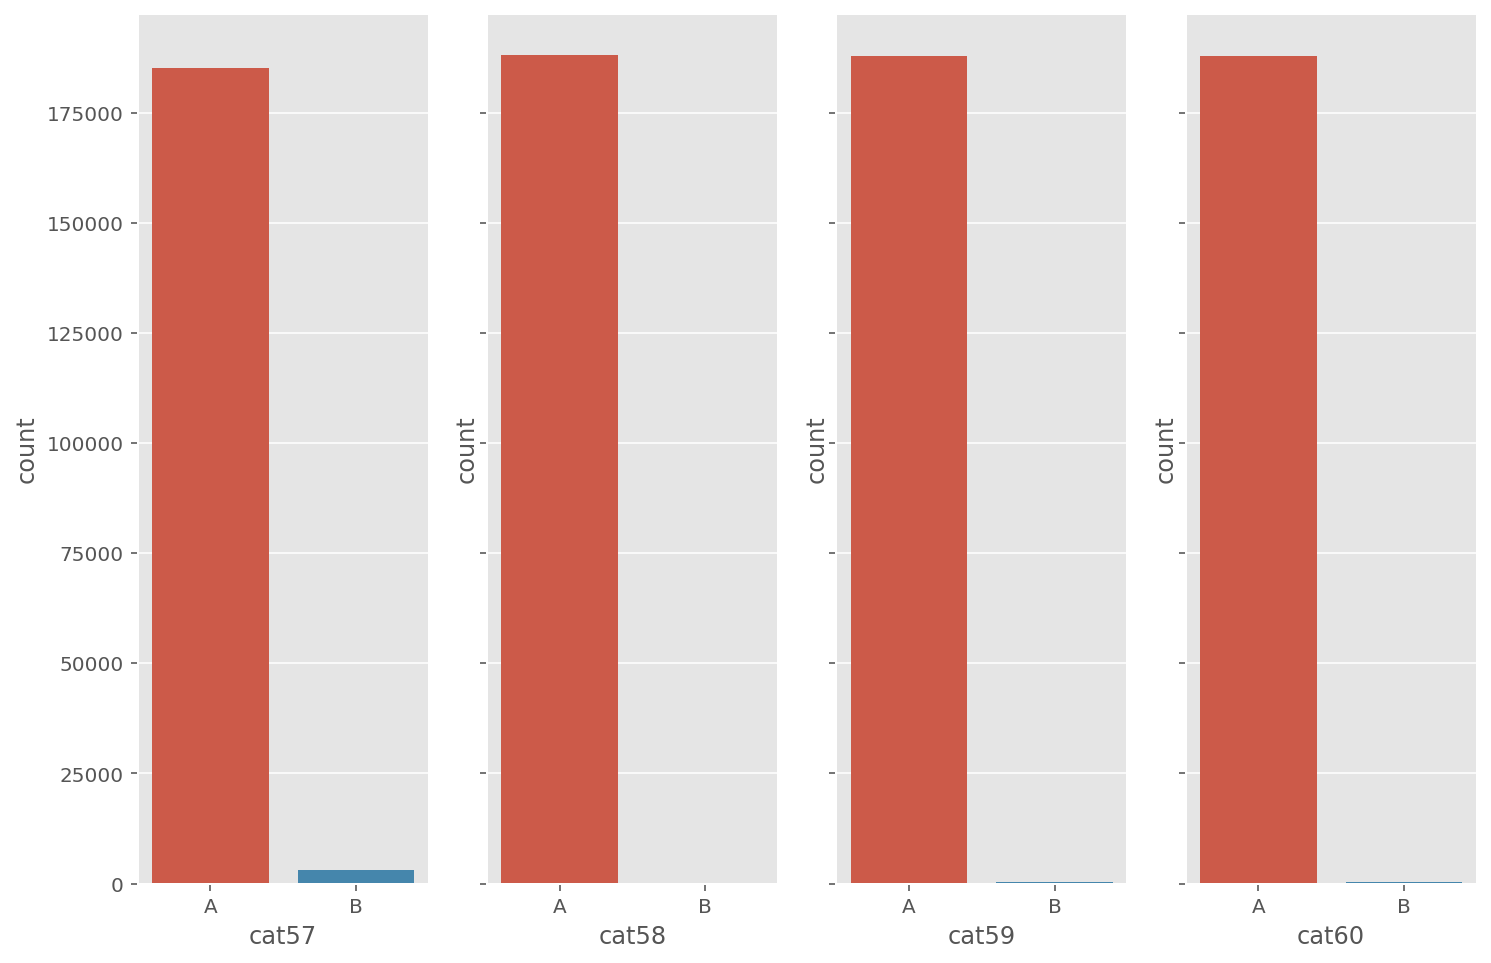

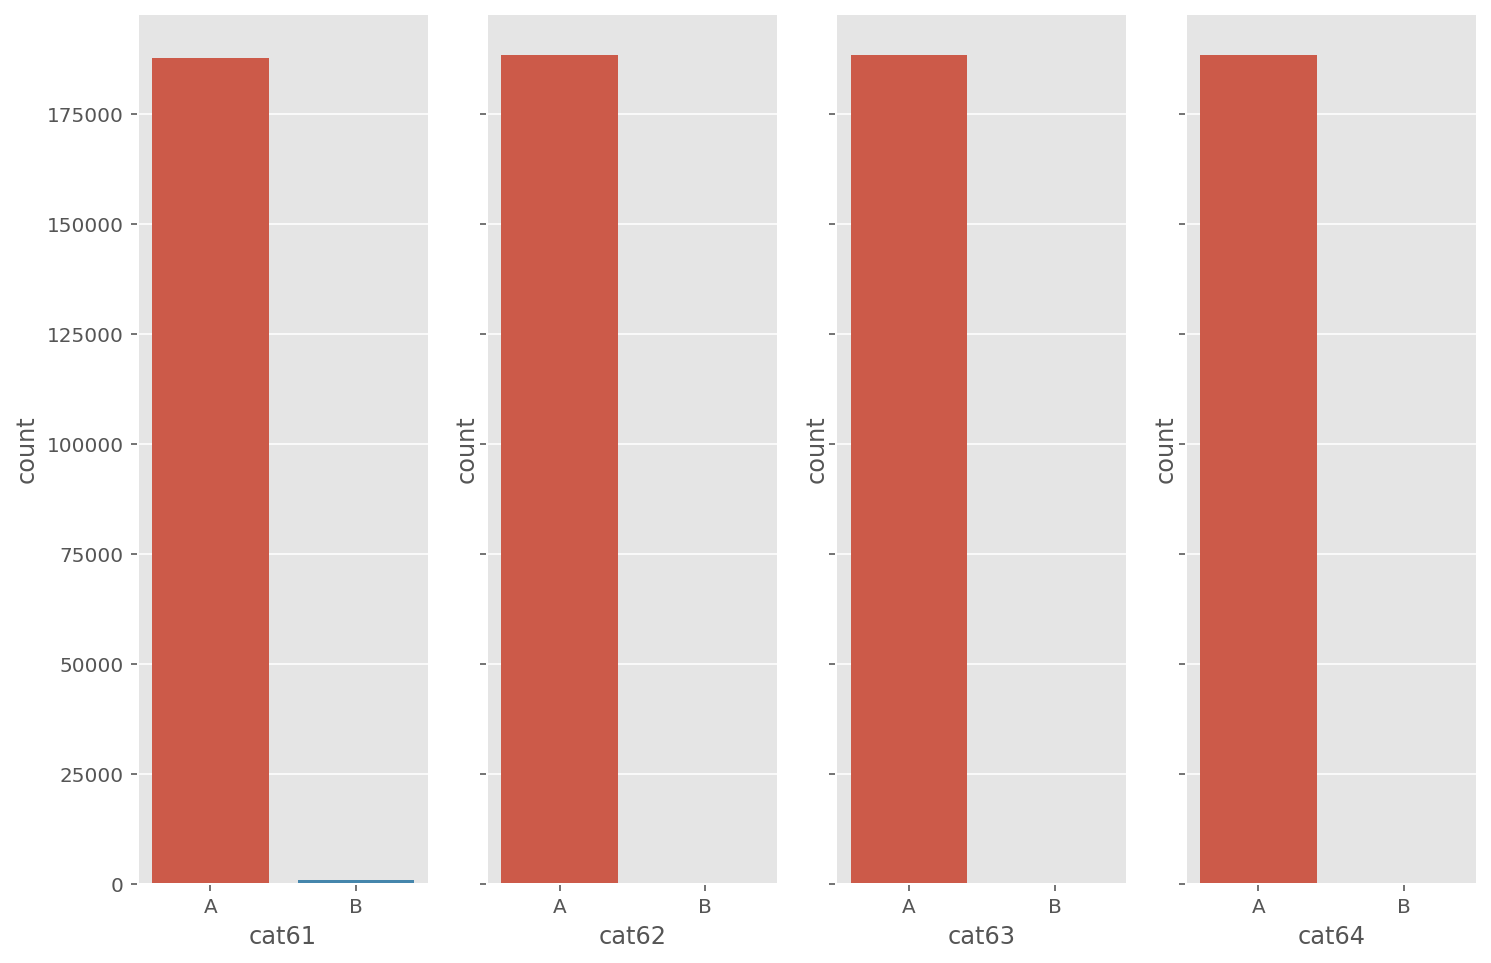

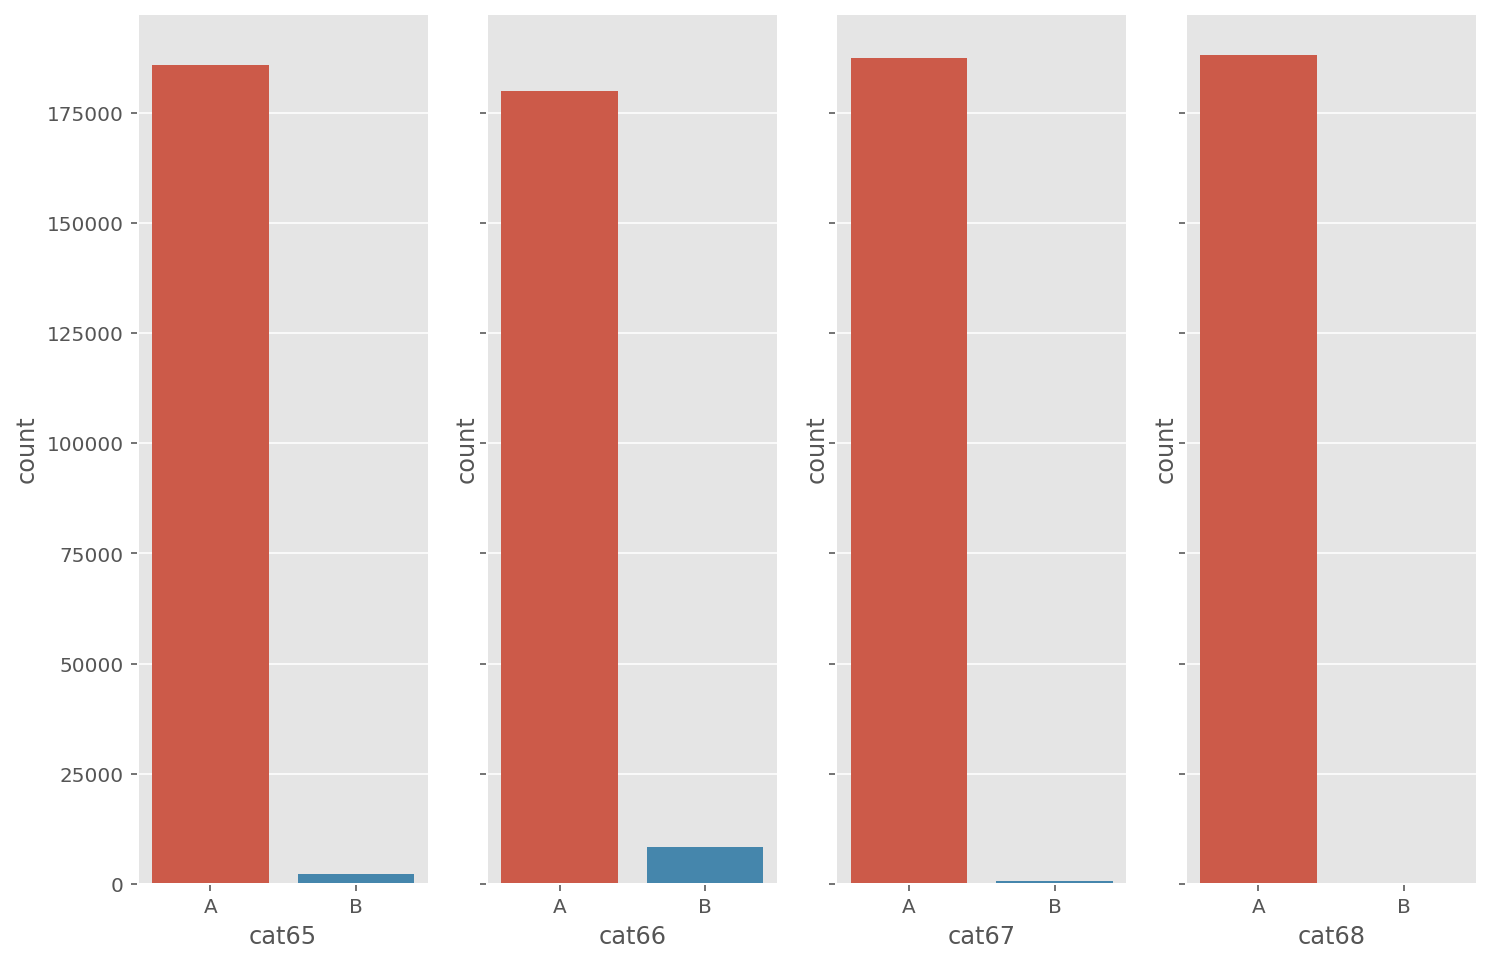

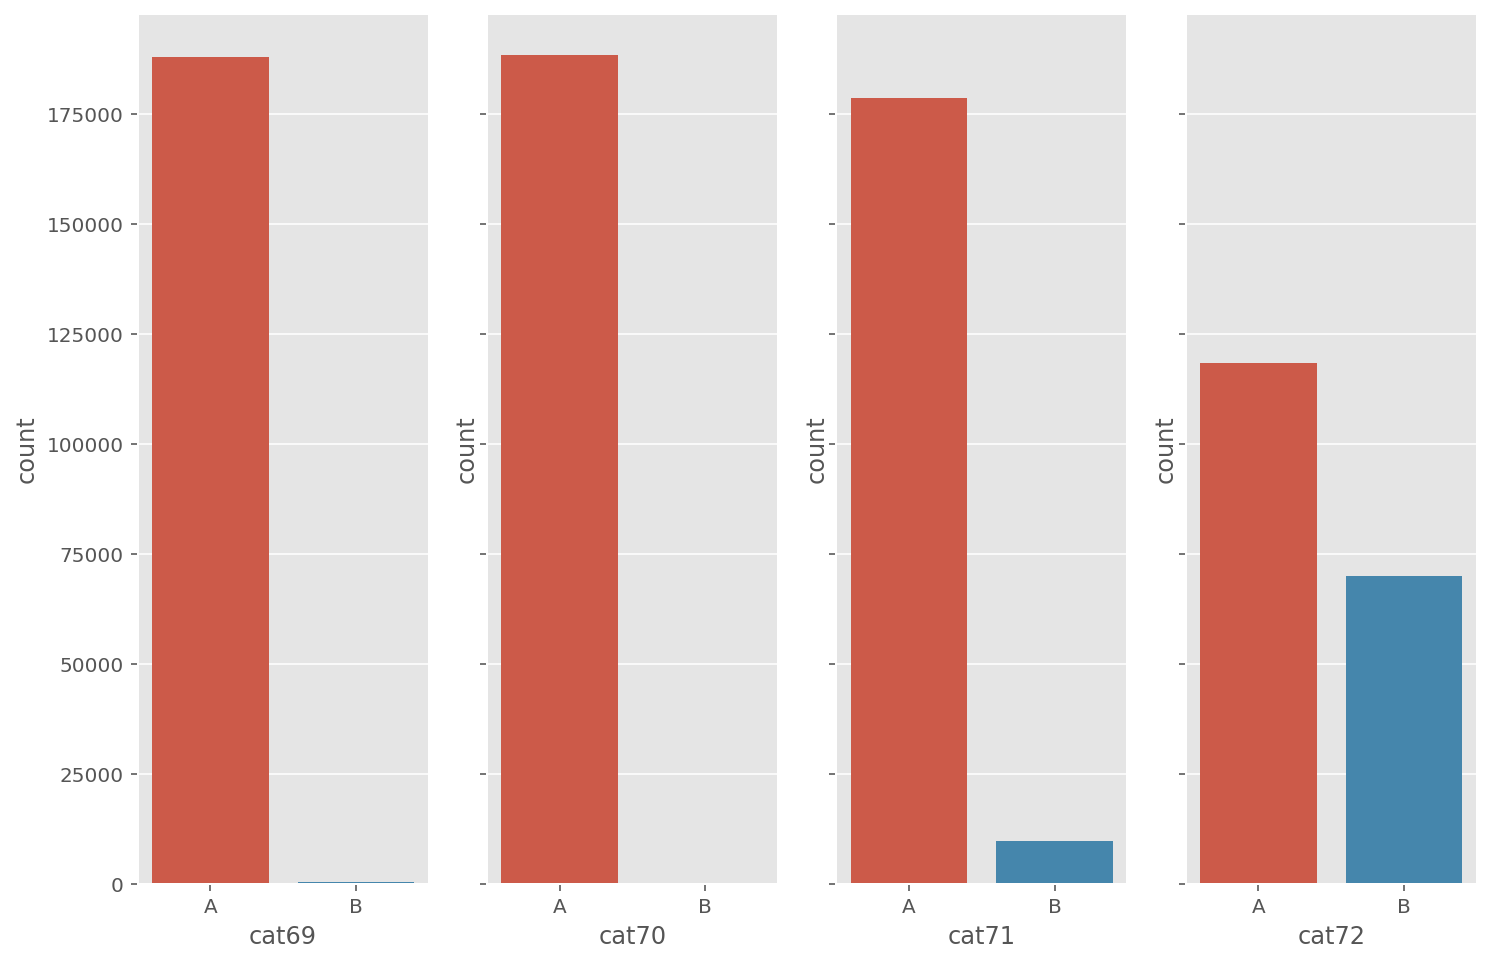

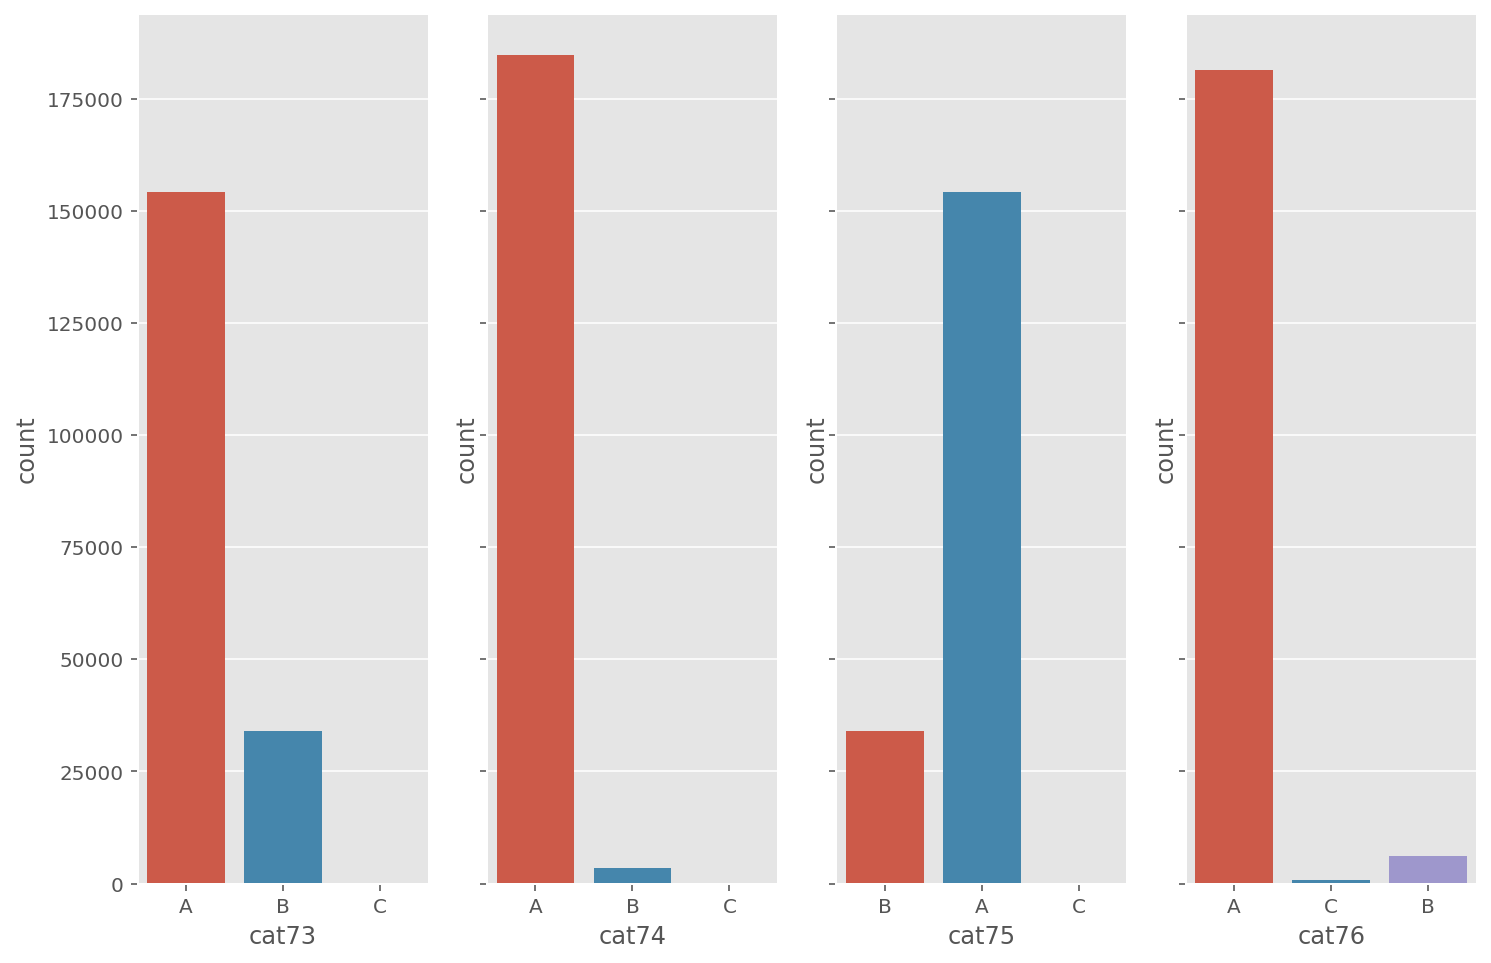

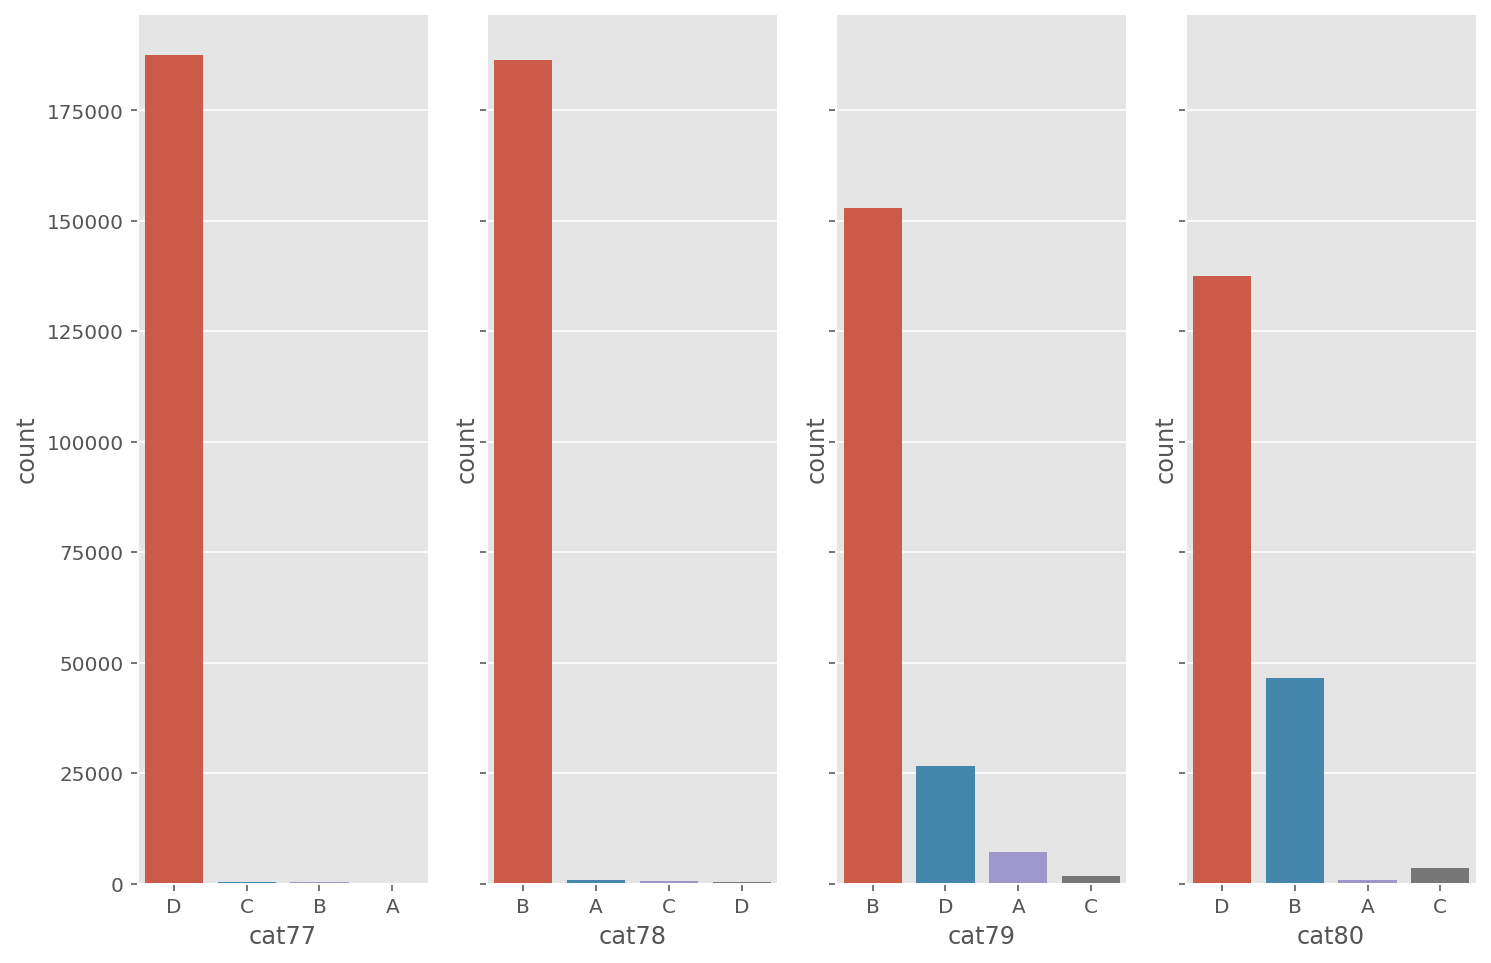

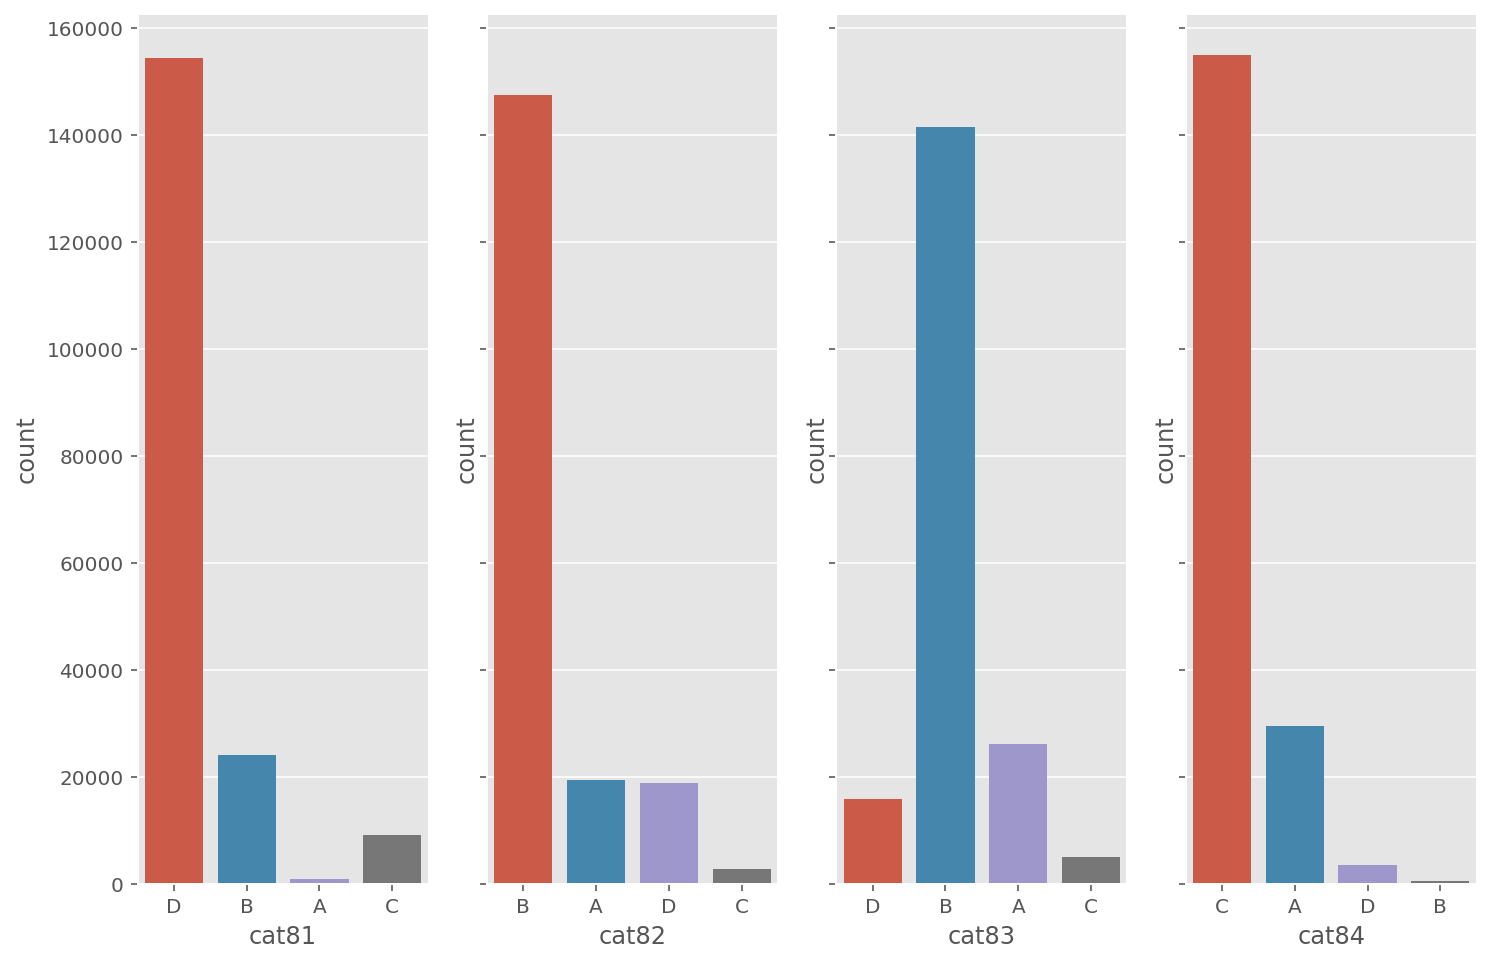

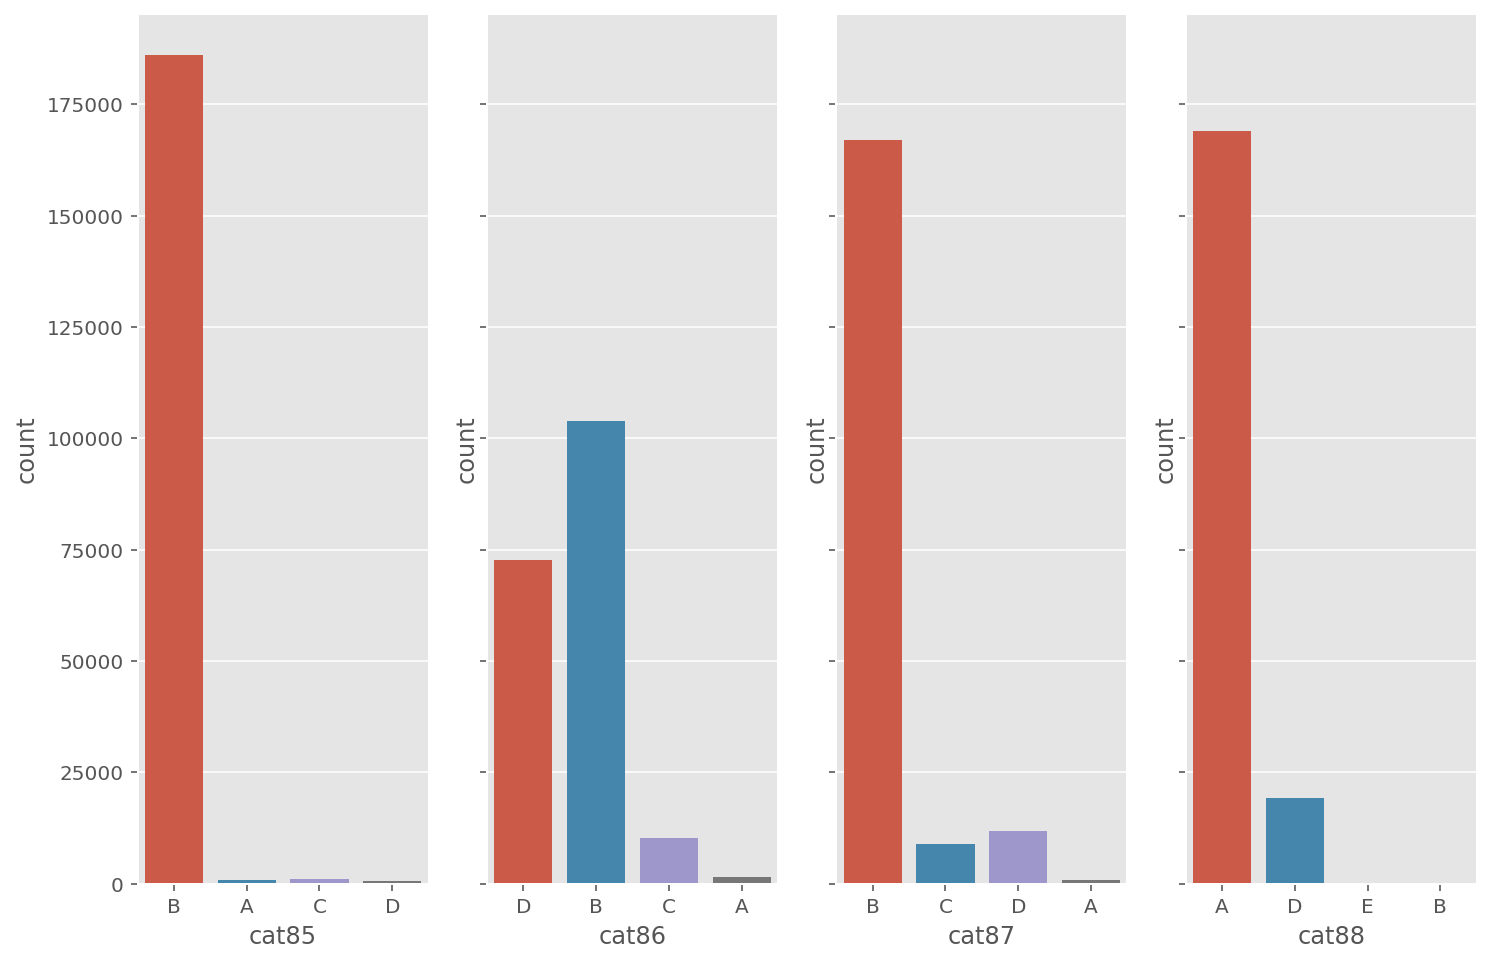

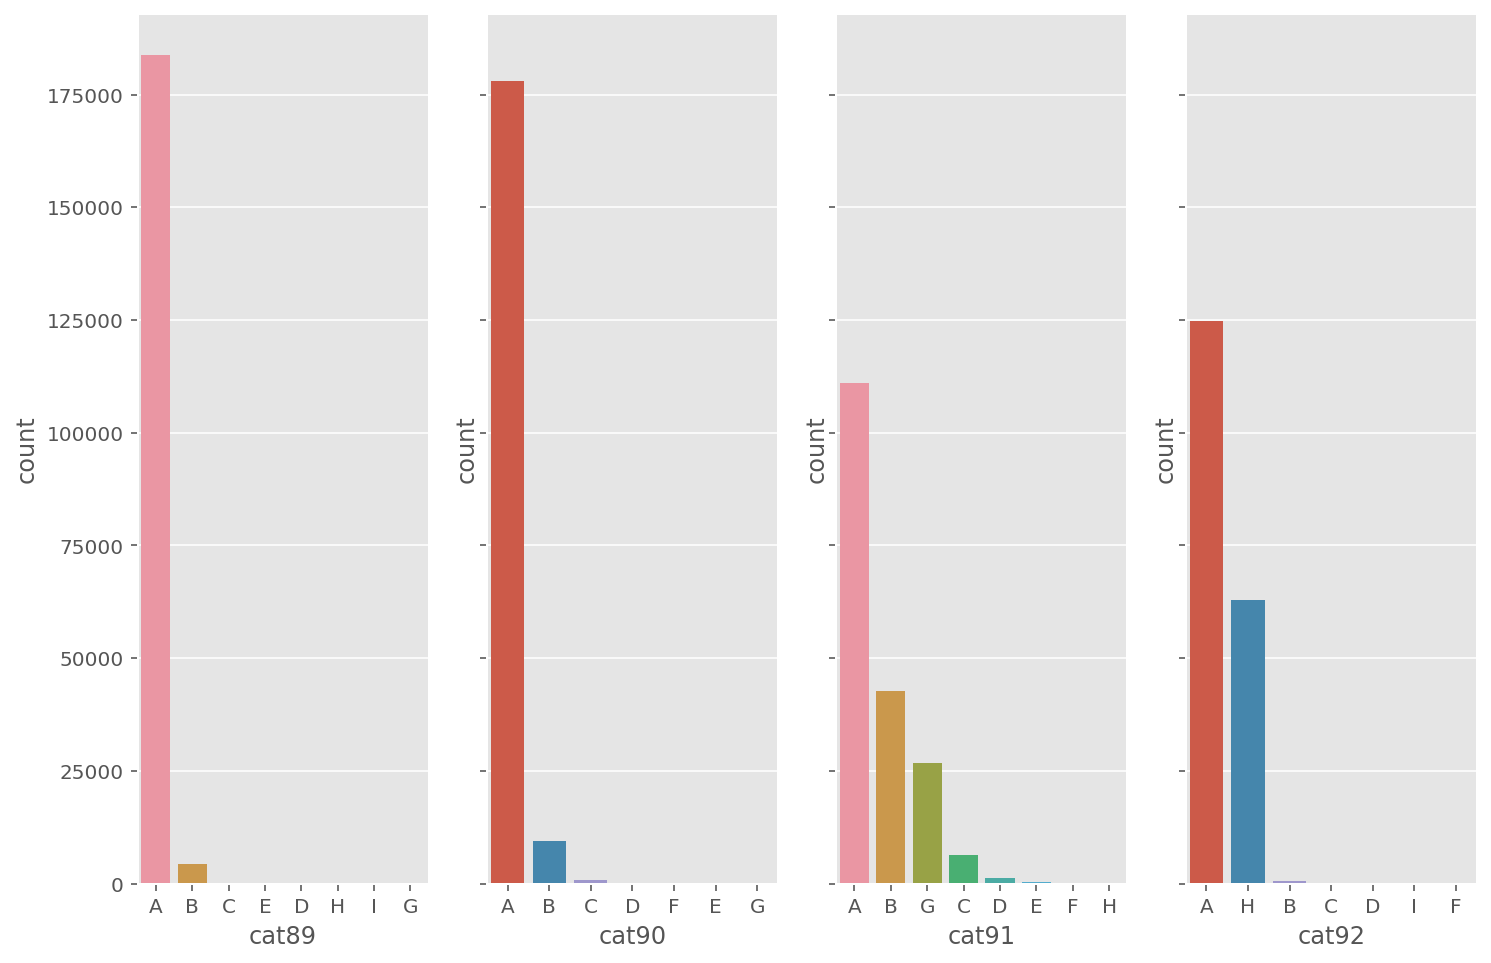

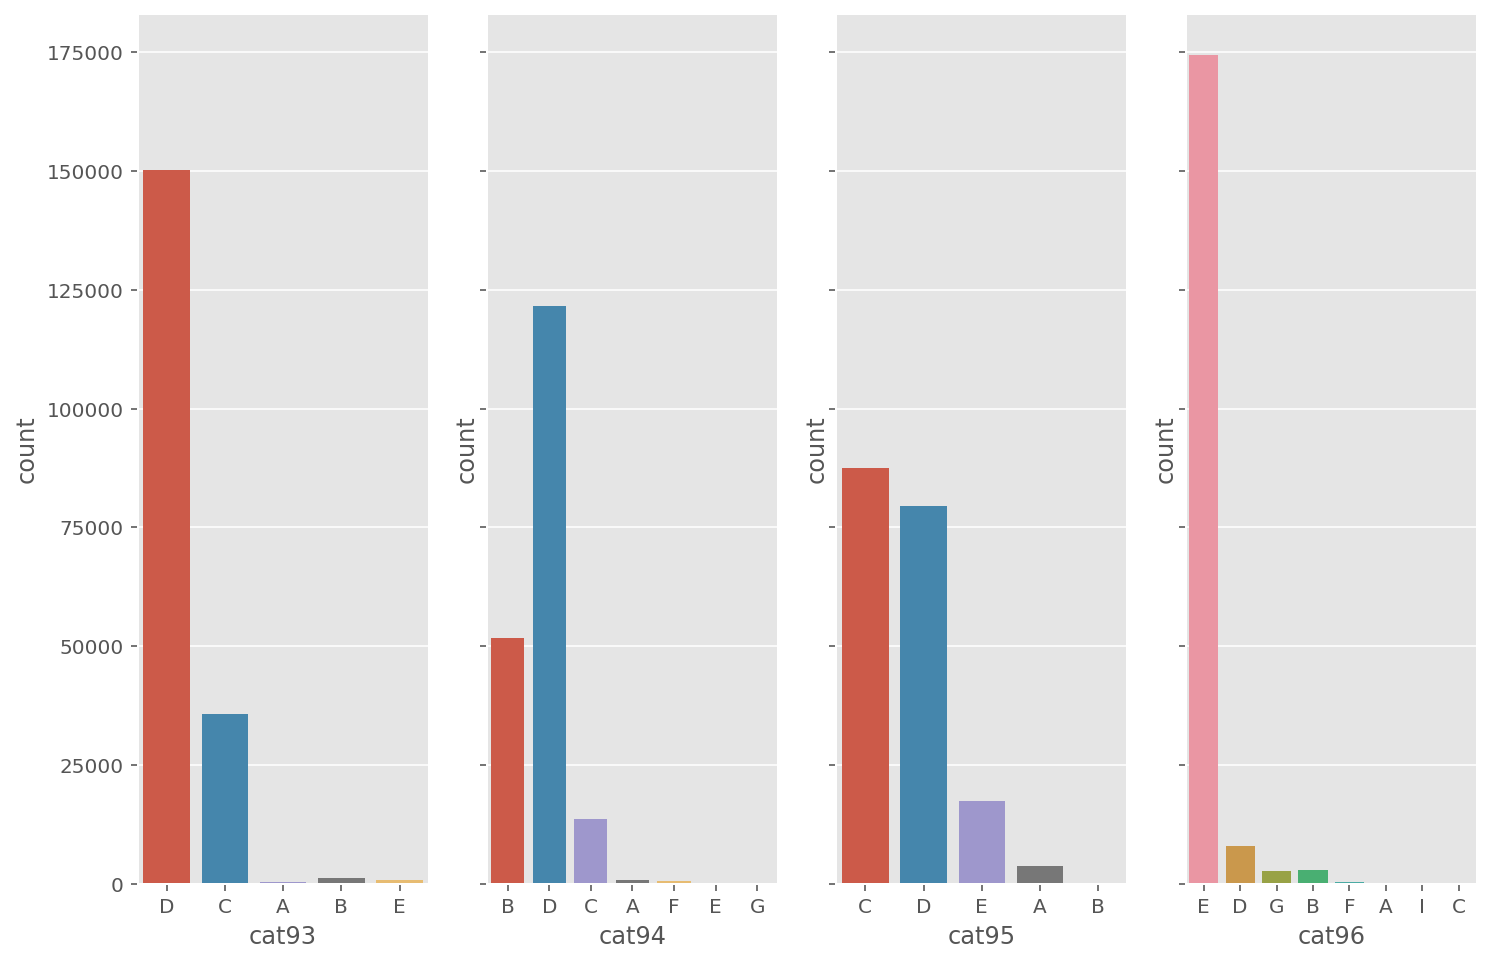

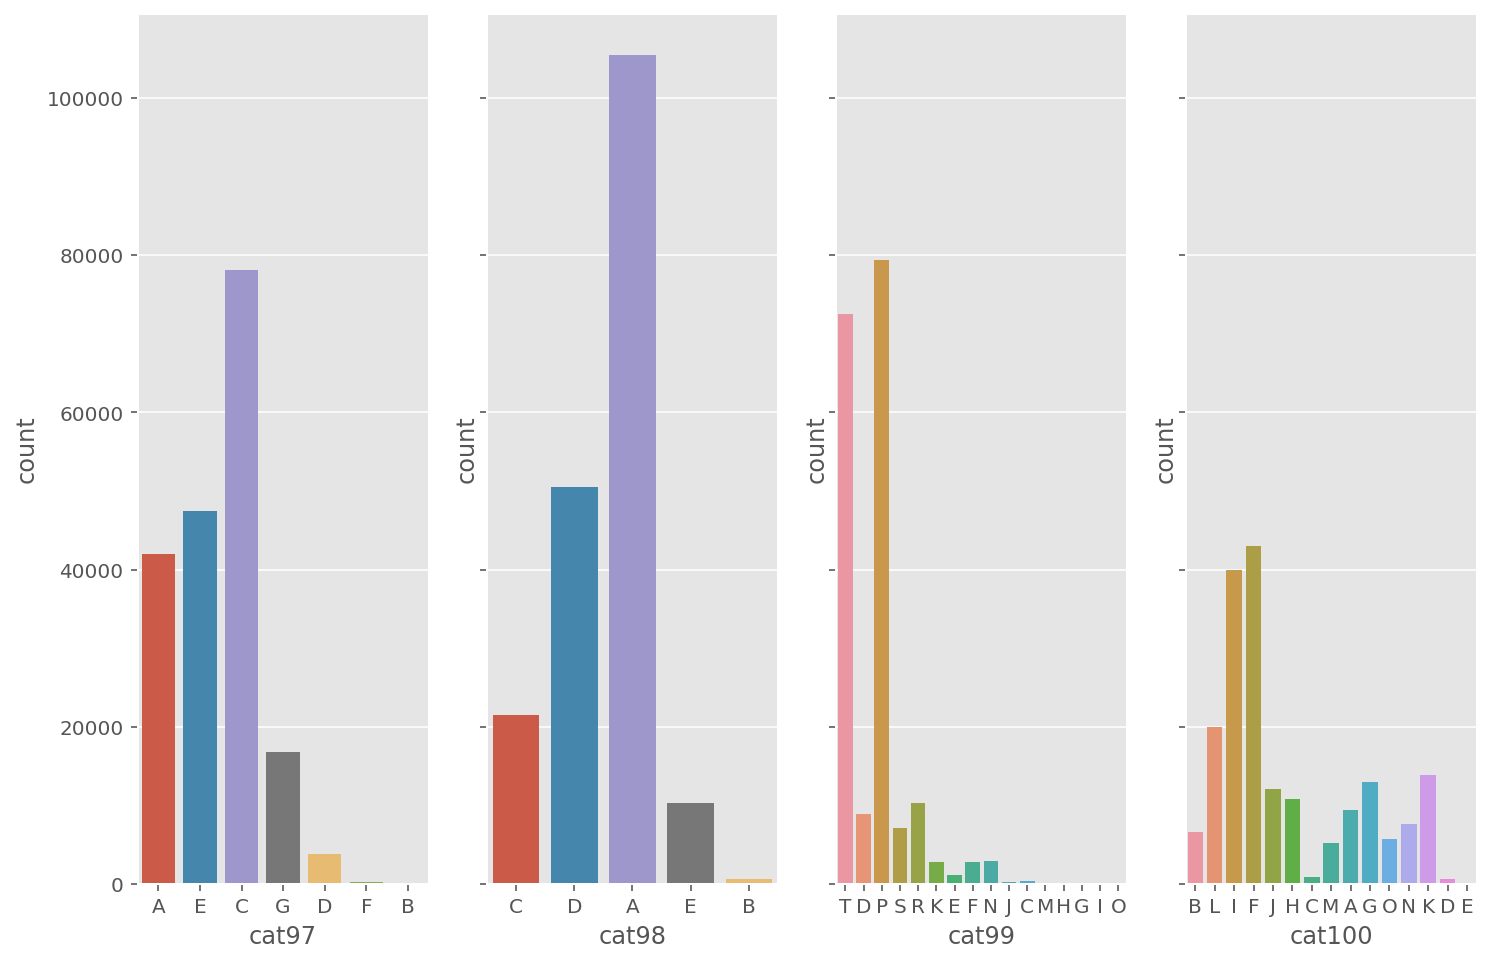

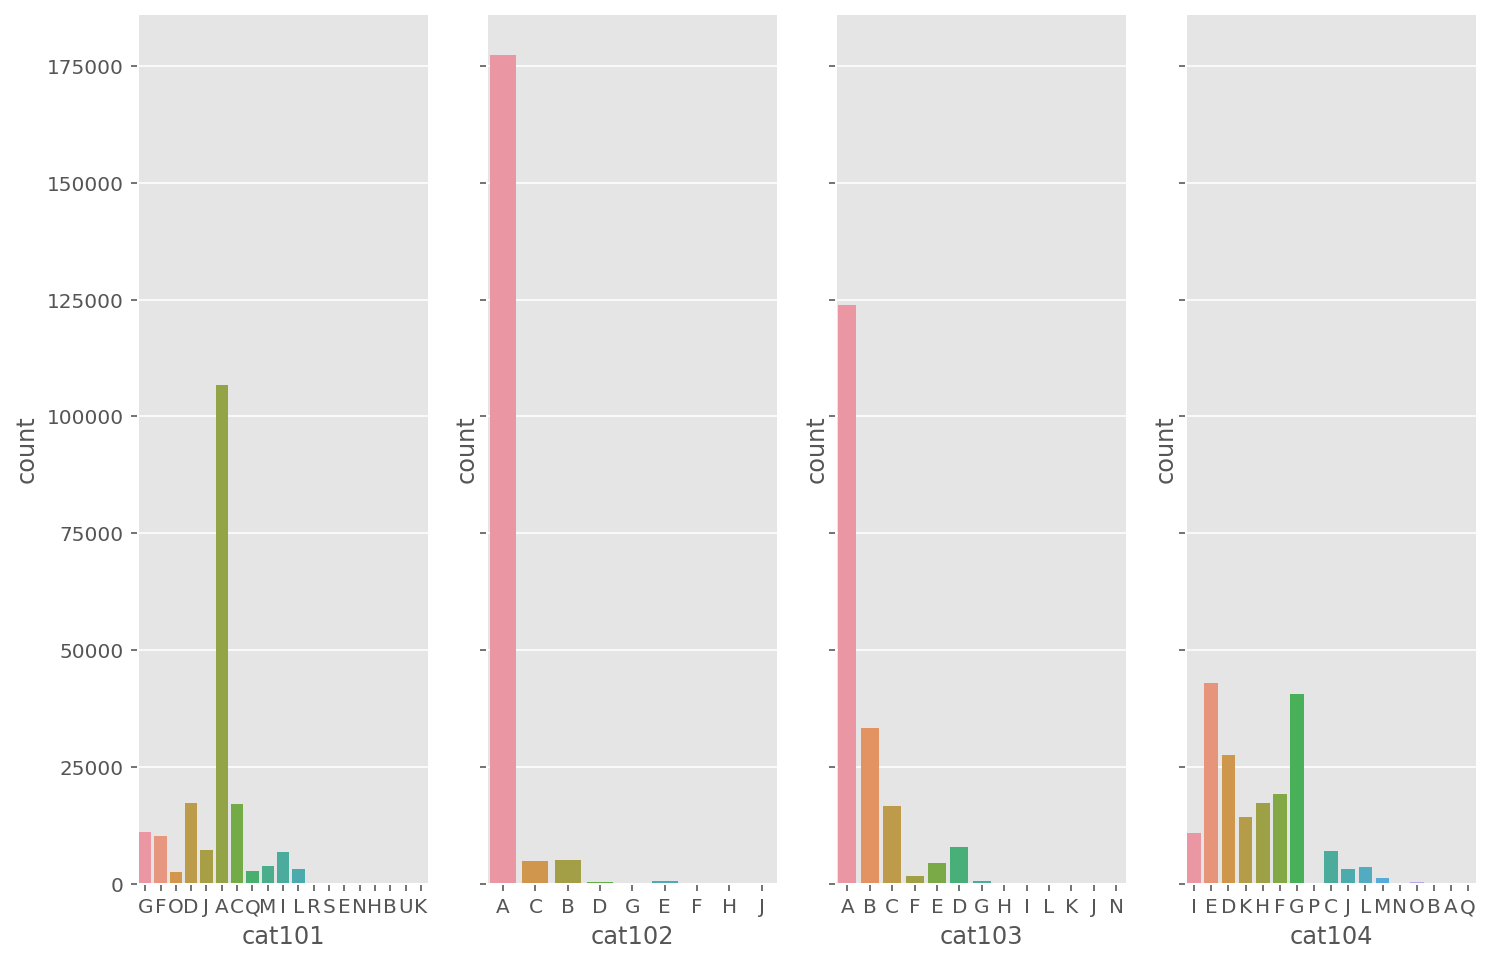

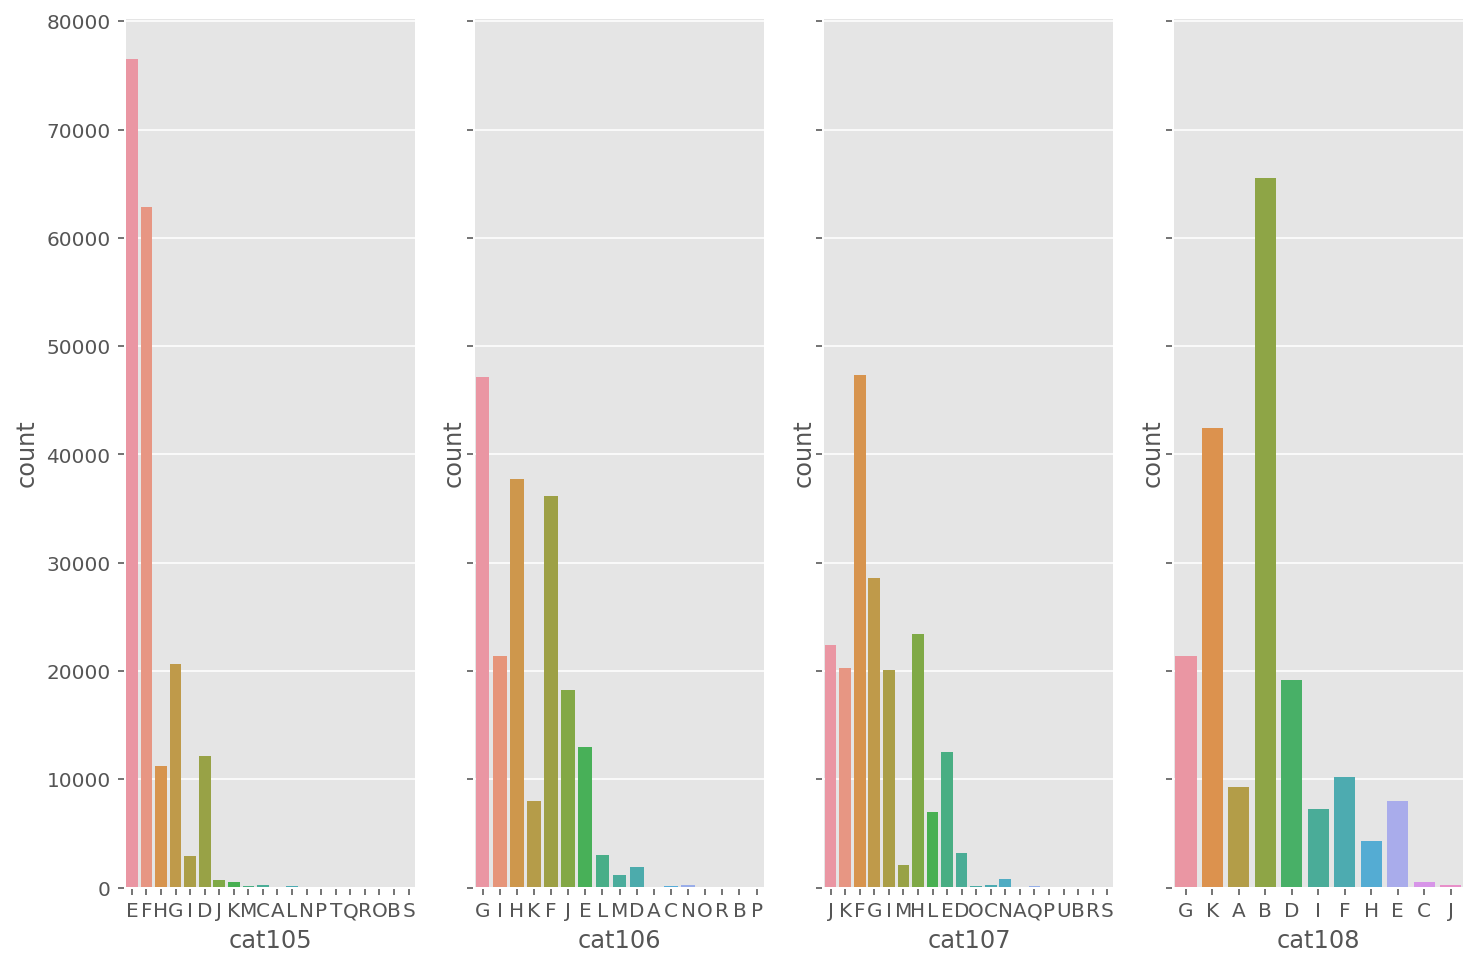

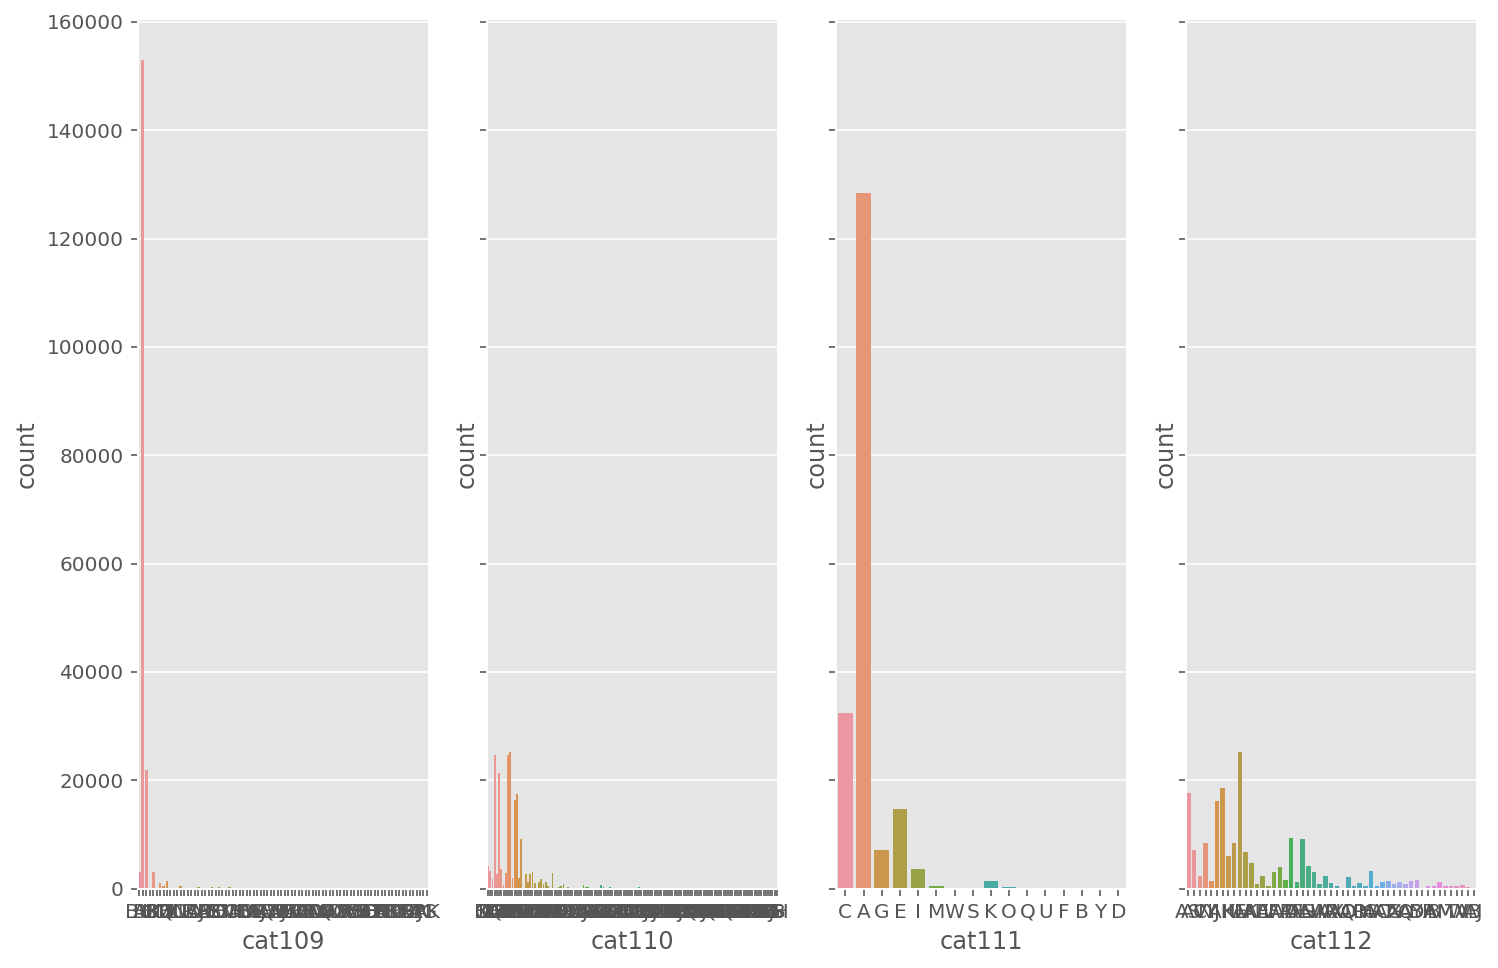

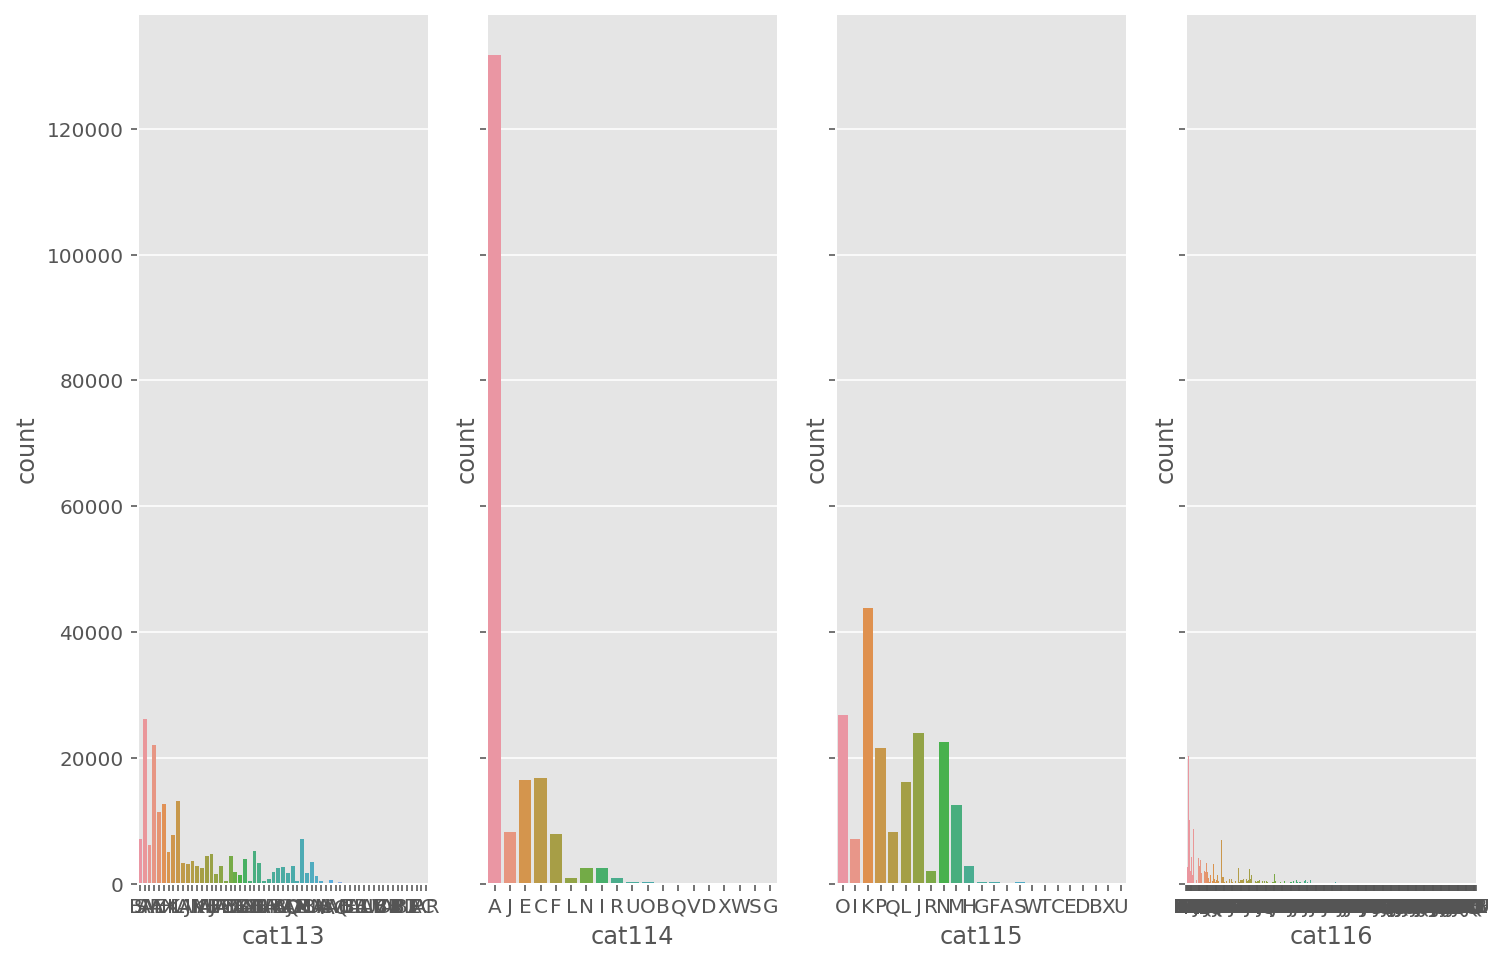

In [17]:
for i in range(n_rows):
    fig,ax = plt.subplots(nrows=1,ncols=n_cols,
                         sharey=True,
                         figsize=(12,8))
    for j in range(n_cols):
        sns.countplot(x=cols_cat[i*n_cols+j],
                     data=df_train_raw,
                     ax=ax[j])

# Correlation for Continuous Variables

In [18]:
df_corr = df_train_raw.corr()

df_corr.head()

id     cont1     cont2     cont3     cont4     cont5     cont6  \
id     1.000000  0.002130  0.000783  0.000816  0.002578  0.000775  0.001426   
cont1  0.002130  1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315   
cont2  0.000783 -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864   
cont3  0.000816 -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278   
cont4  0.002578  0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932   

          cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id     0.002209  0.005534  0.001870  0.002582  0.001075  0.000889  0.000442   
cont1  0.367384  0.361163  0.929912  0.808551  0.596090  0.614225  0.534850   
cont2  0.048187  0.137468 -0.032729  0.063526  0.116824  0.106250  0.023335   
cont3  0.097516 -0.185432 -0.417054 -0.325562  0.025271  0.006111 -0.418203   
cont4 -0.115064  0.528740  0.328961  0.283294  0.120927  0.130453  0.179342   

         cont14      loss  
id    -0.004924 -0.001122  
cont1  0.056688 -0.010237  
cont2 -0.045584  0.141528  
cont3 -0.039592  0.111053  
cont4  0.017445 -0.035831

In [49]:
def get_most_correlated_features(df,threshold=0.5):
    """Get the most correlated features above given threshold.
    
    Note: 
    1. Only numerical features have correlation.
    2. Here we only get absolute correlation.
    
    """

    df1 = (df.corr()
    .abs()
    .unstack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'level_0':'feature1',
                    'level_1':'feature2',
                    0:'corr'})
    .query('feature1 != feature2')
    .assign(
    tmp = lambda dfx: dfx[['feature1', 'feature2']]\
                .apply(lambda x: '_'.join(sorted(tuple(x))),
                       axis=1)
        )
    .drop_duplicates('tmp')
    .drop('tmp',axis=1)
    .query('corr > @threshold')
    )

    return df1

In [51]:
df_corr_most = get_most_correlated_features(df_train_raw,threshold=0.5)

df_corr_most.style.background_gradient(subset=['corr'])

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


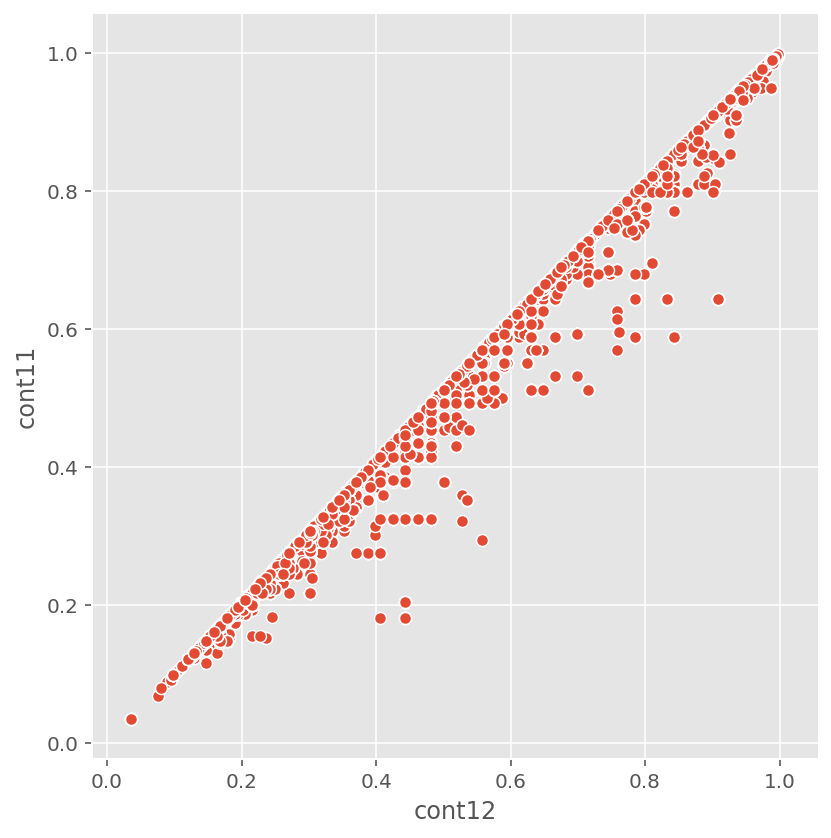

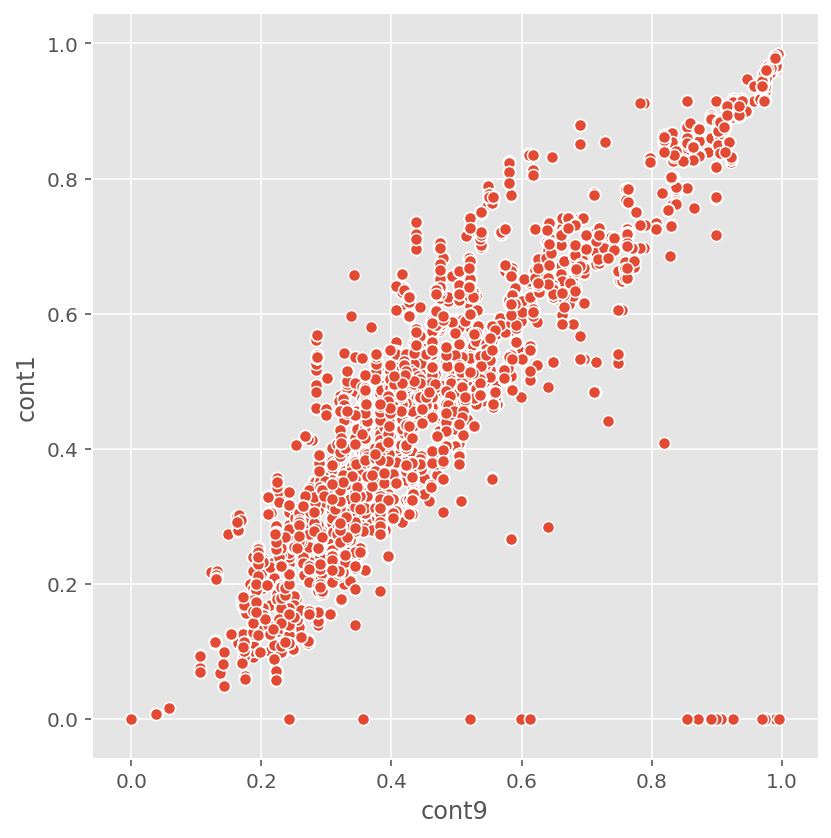

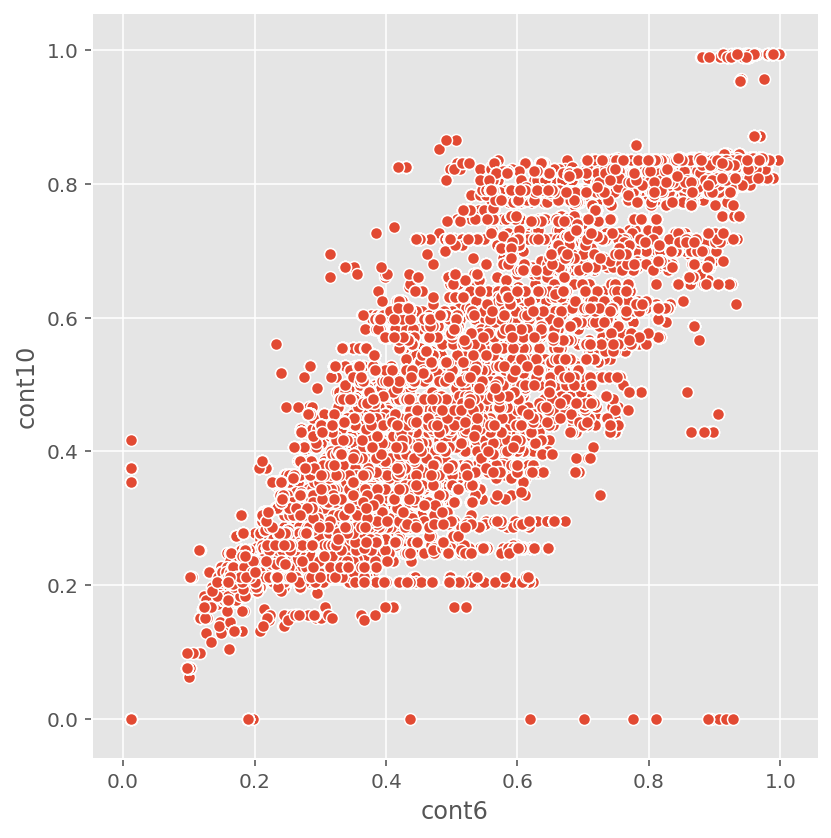

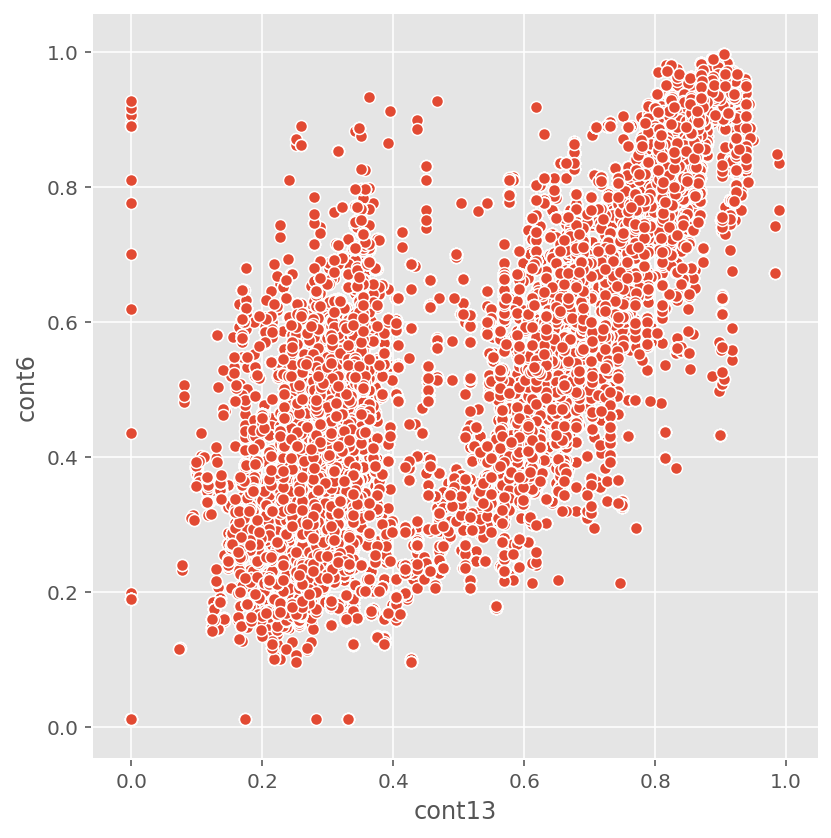

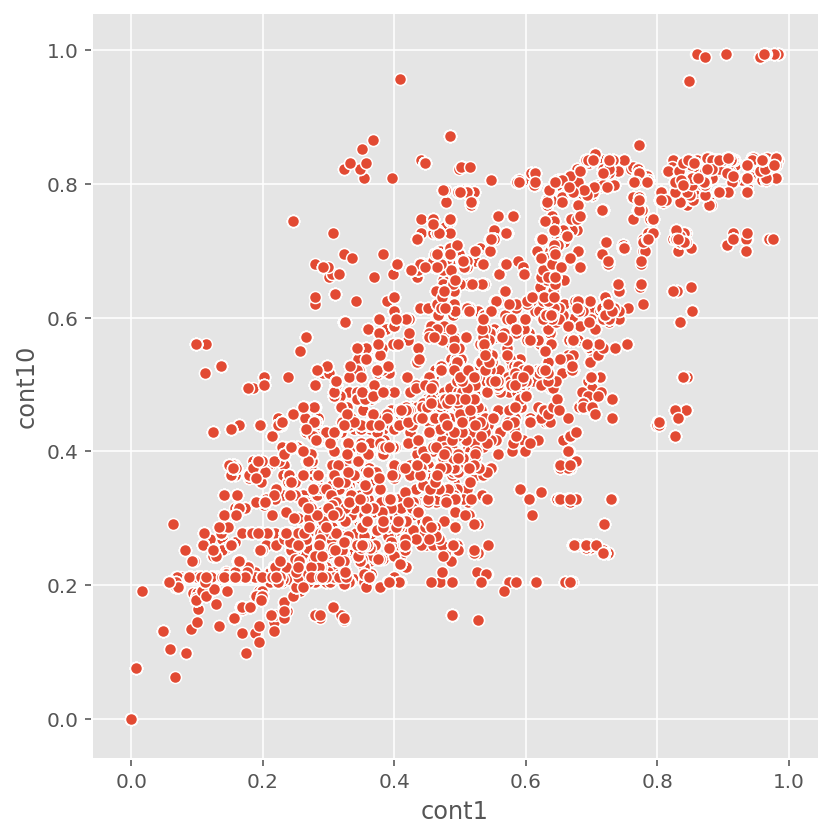

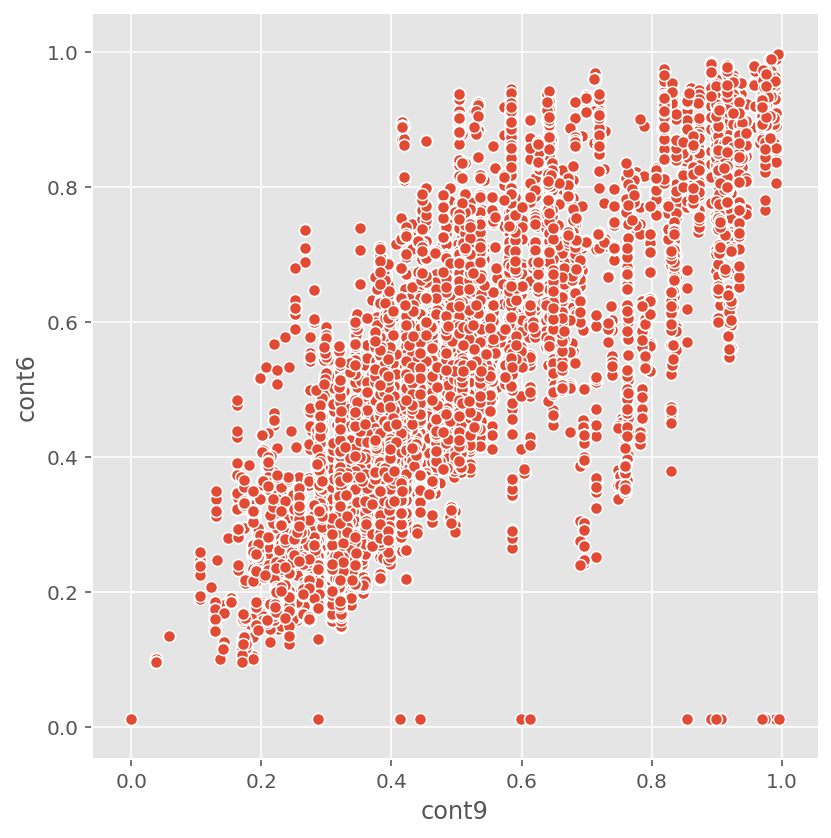

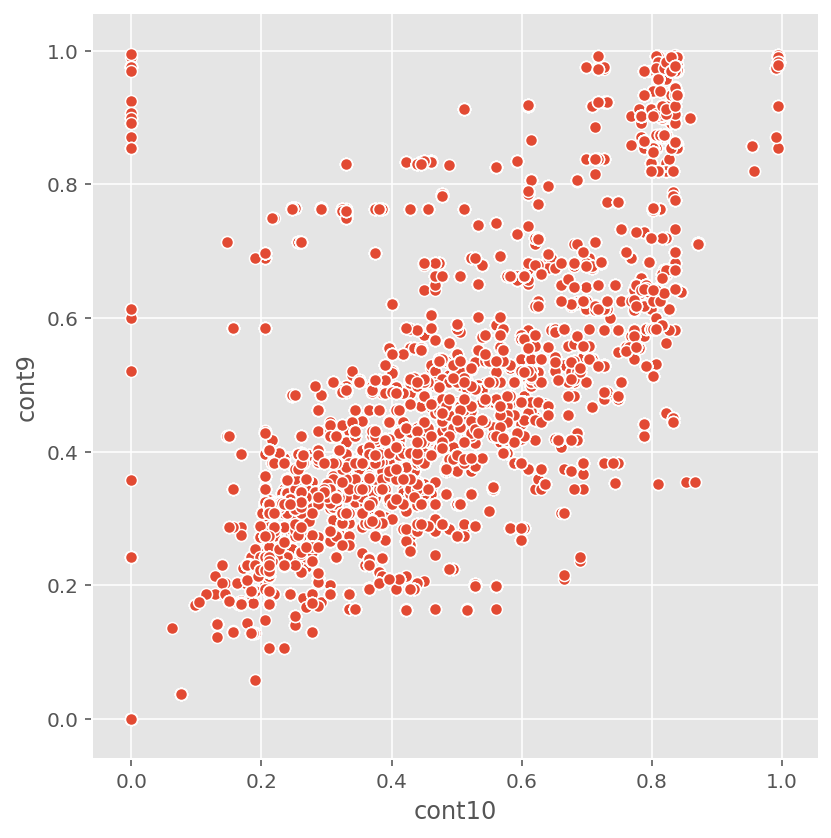

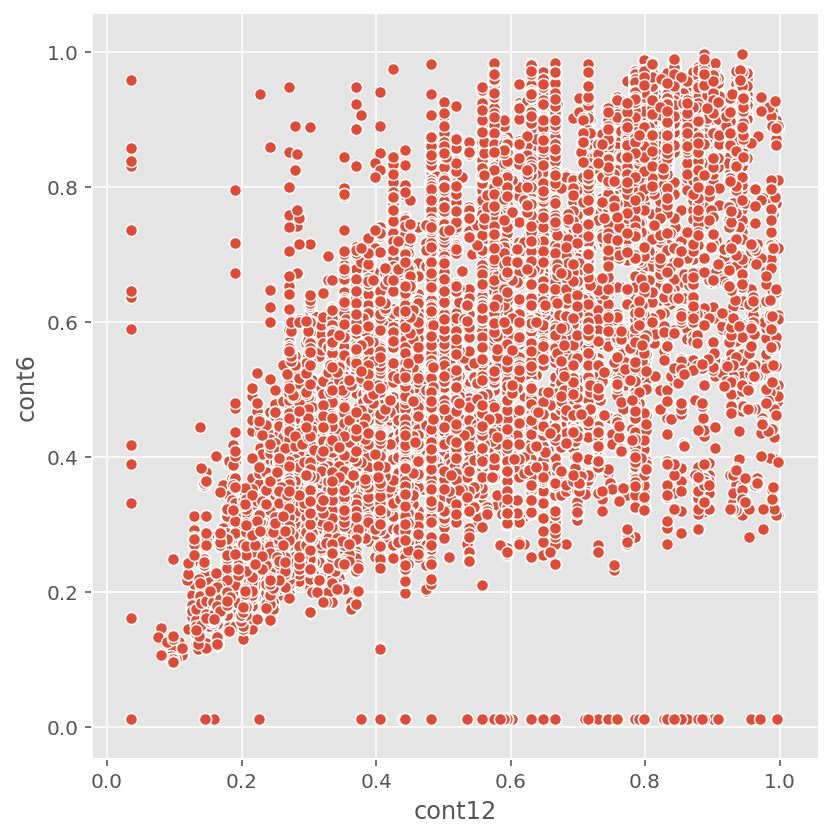

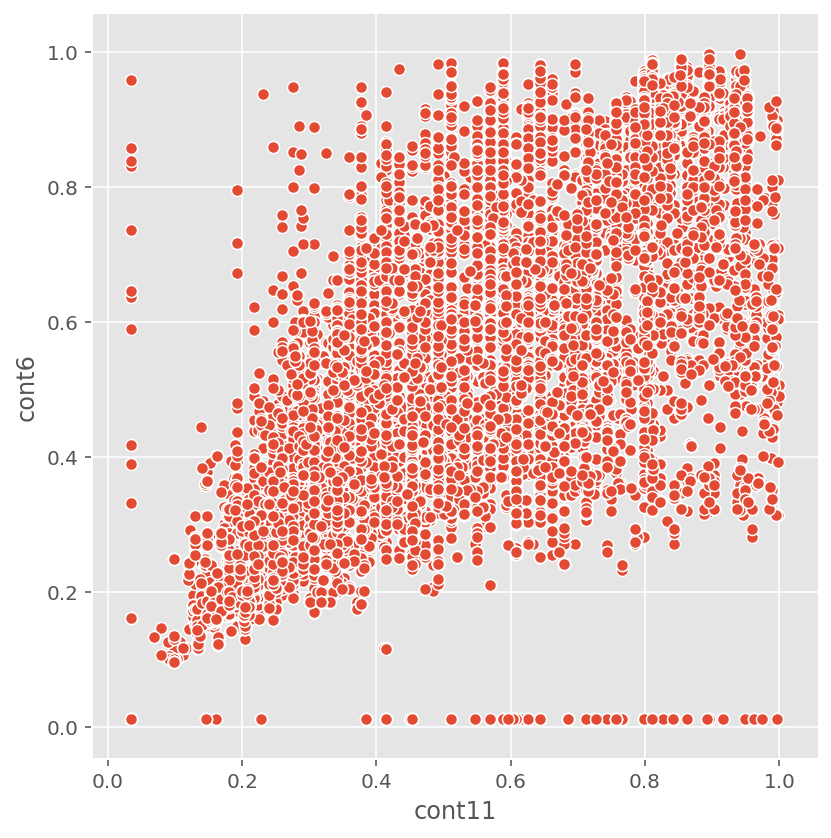

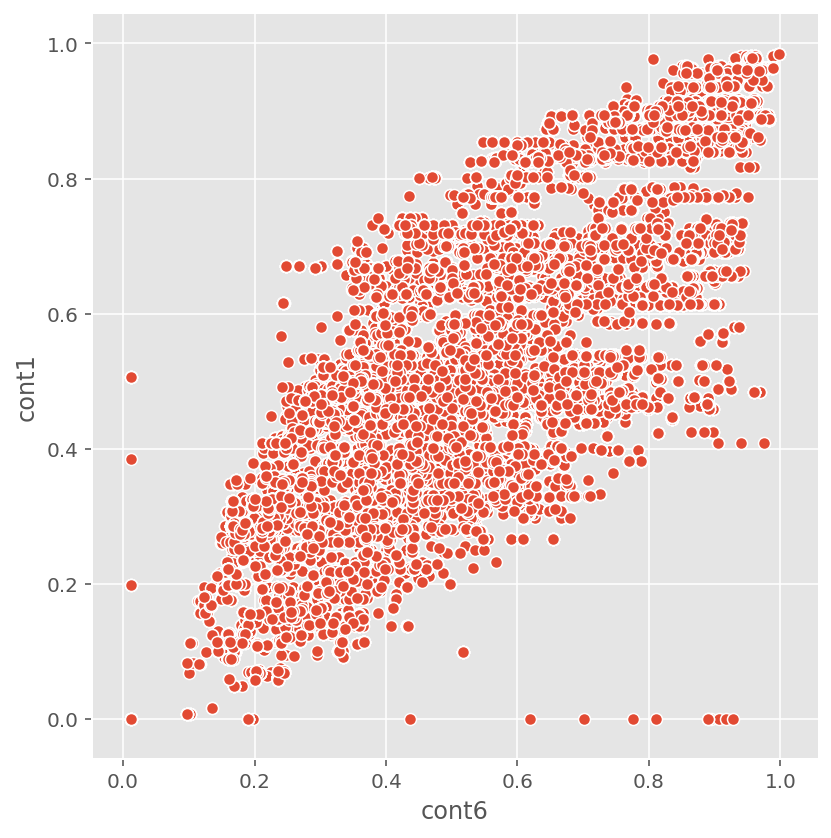

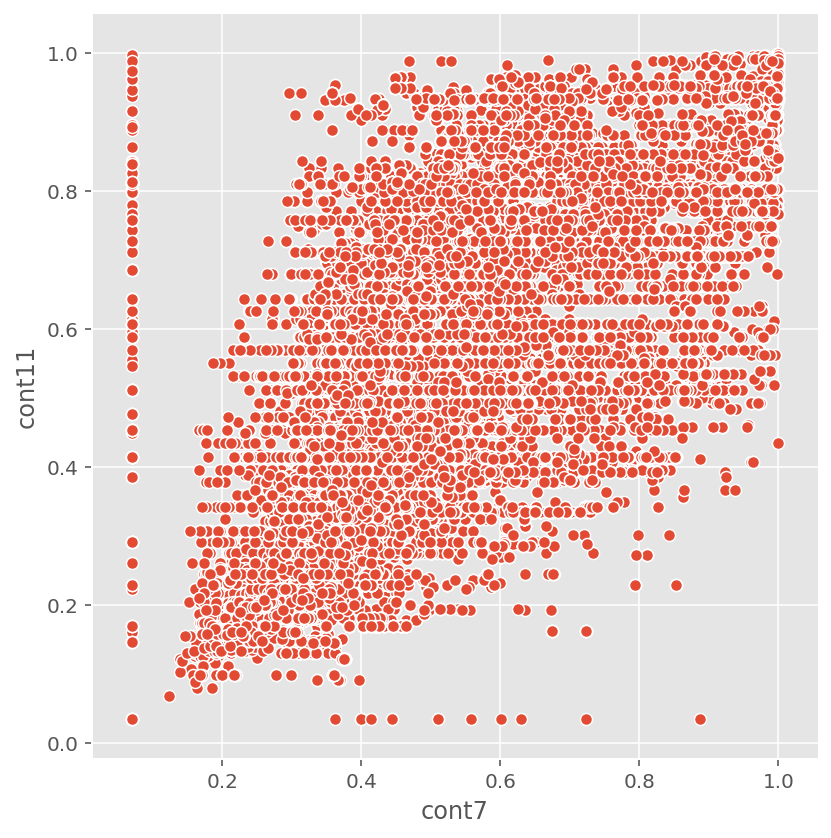

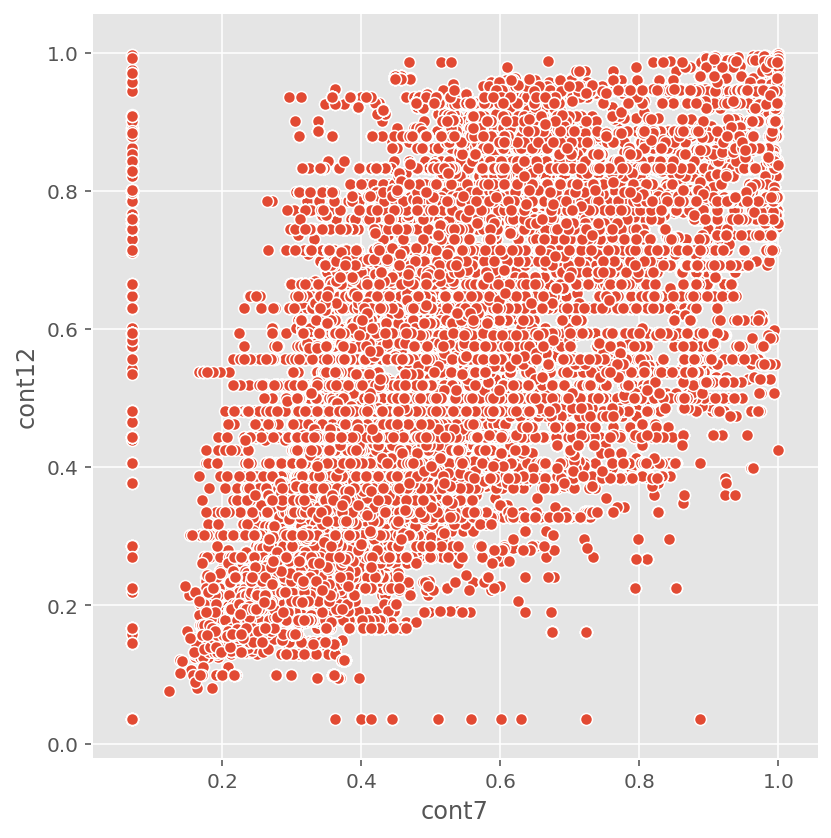

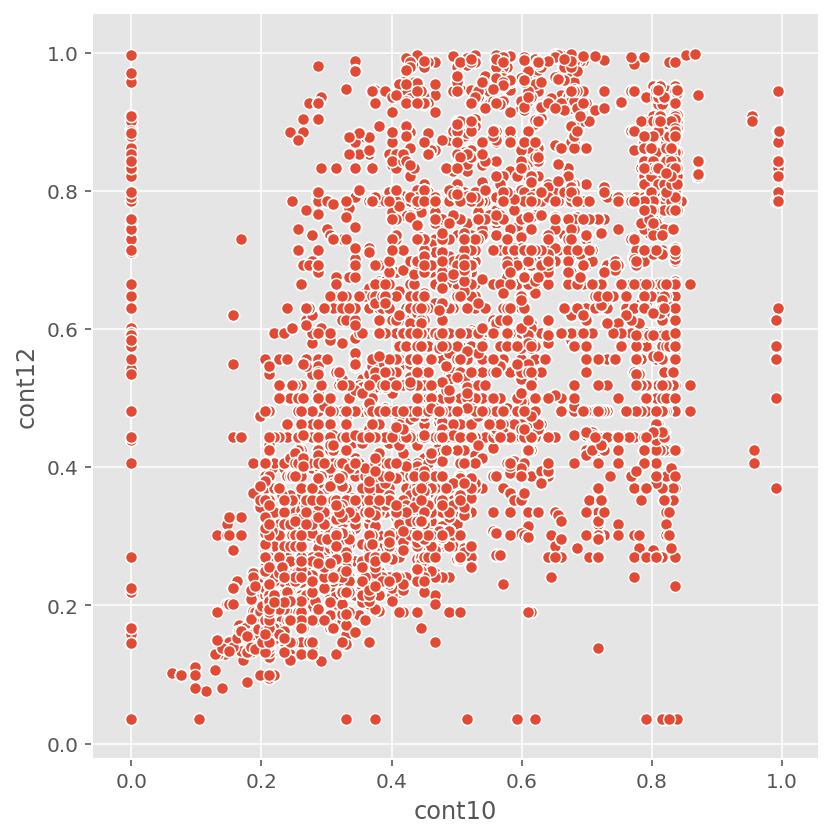

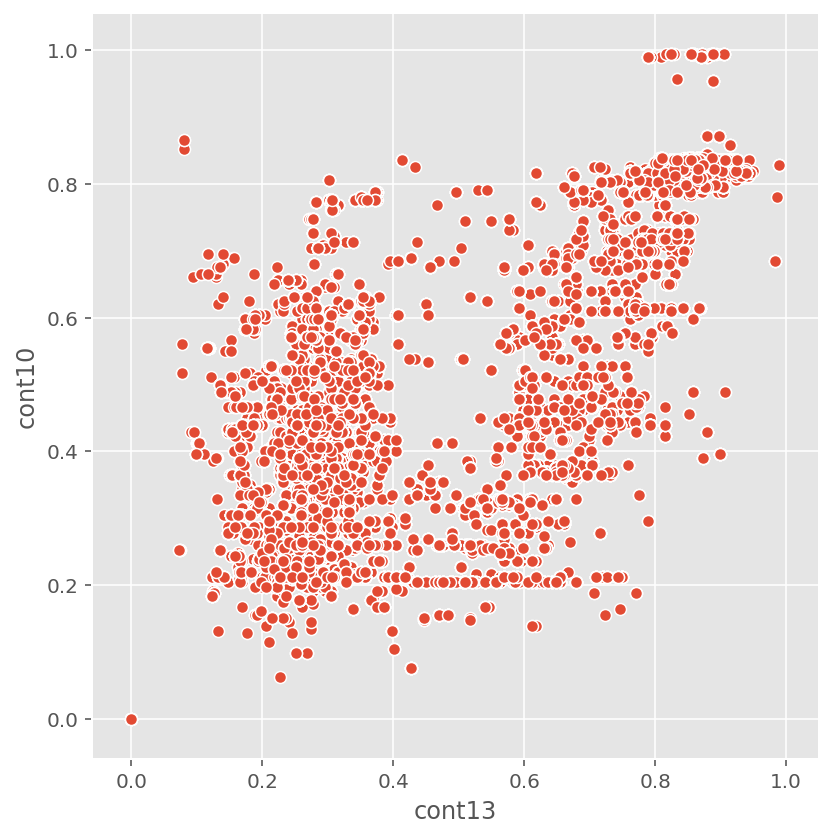

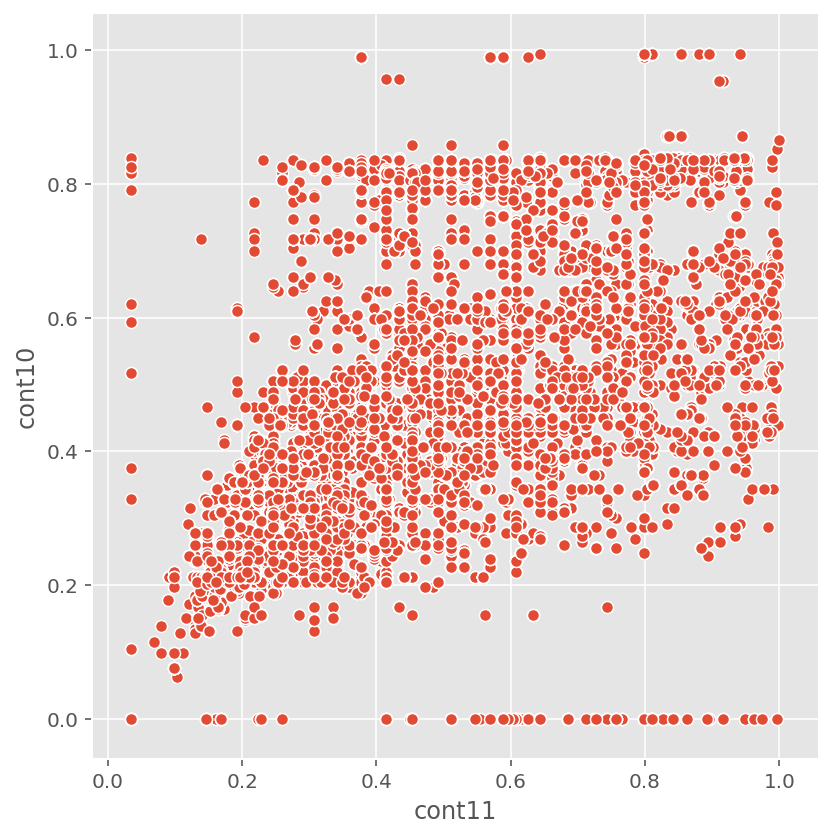

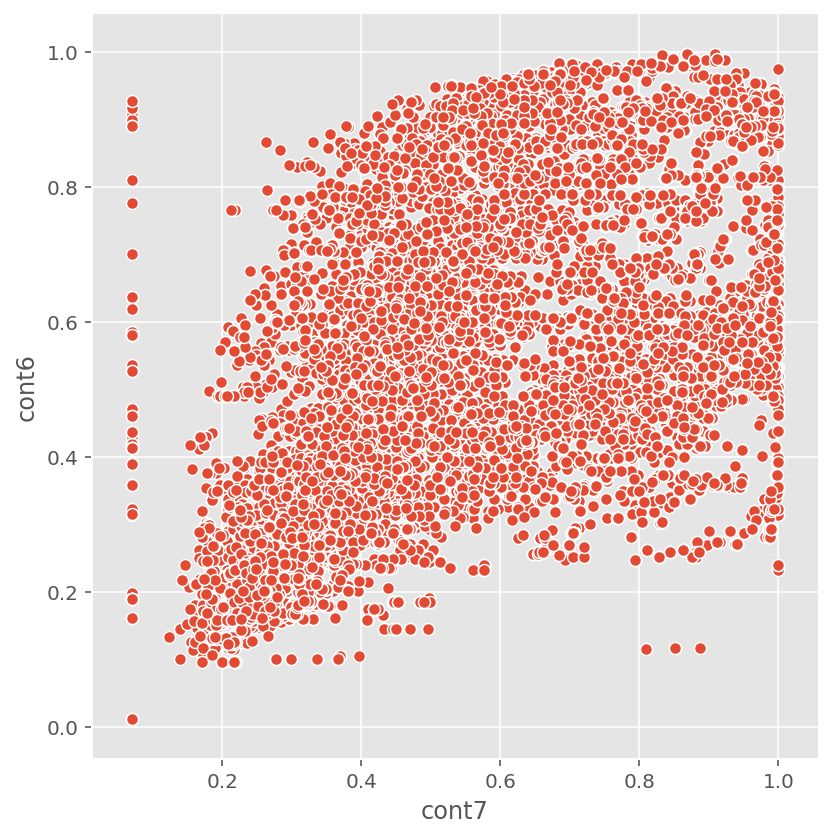

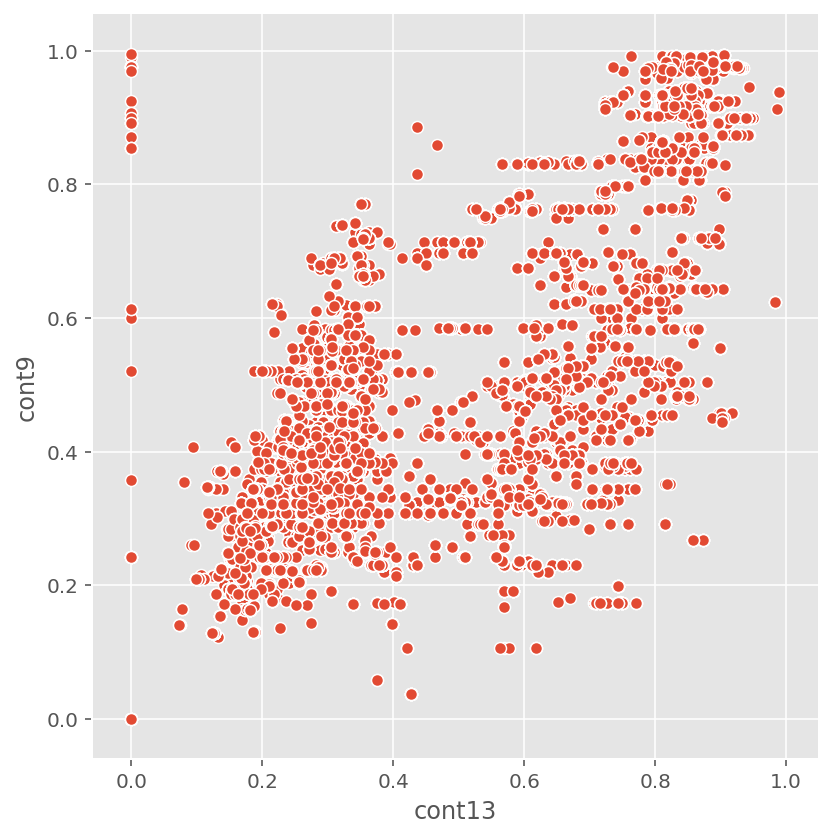

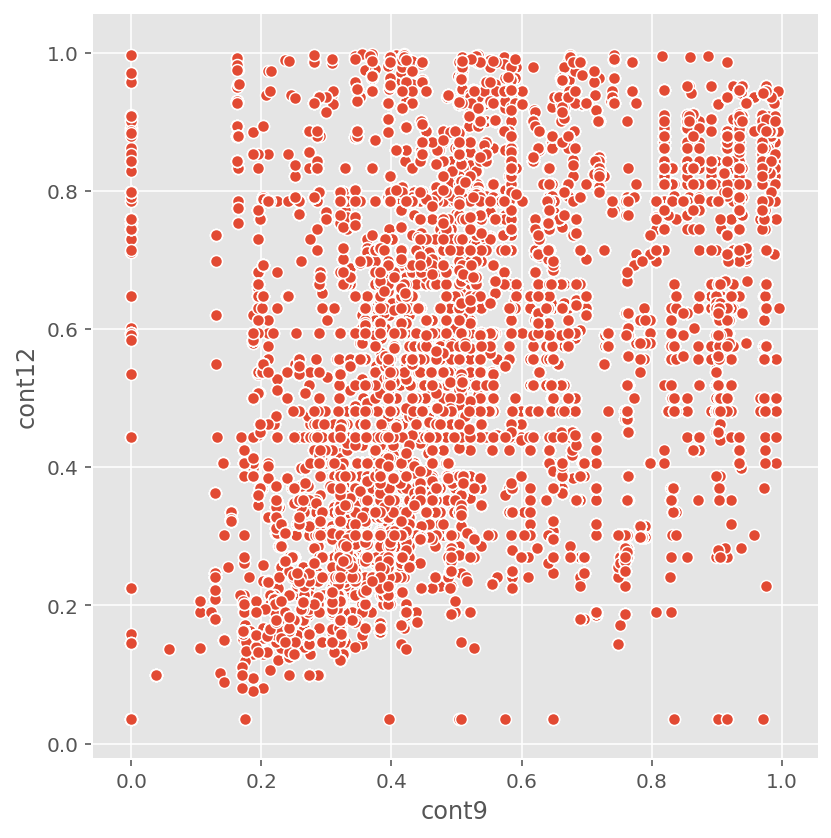

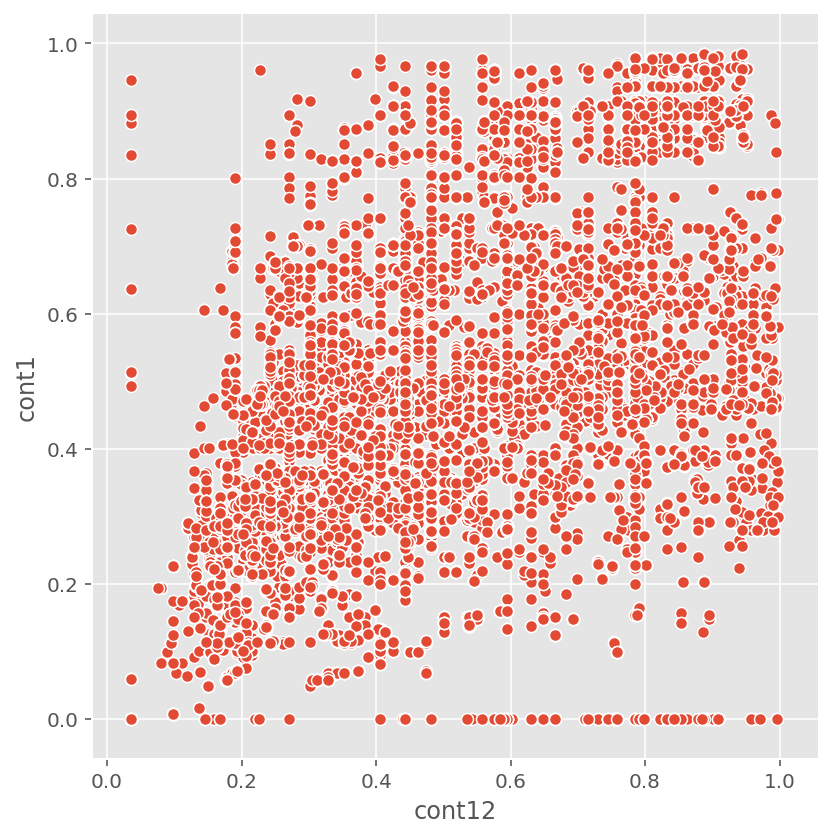

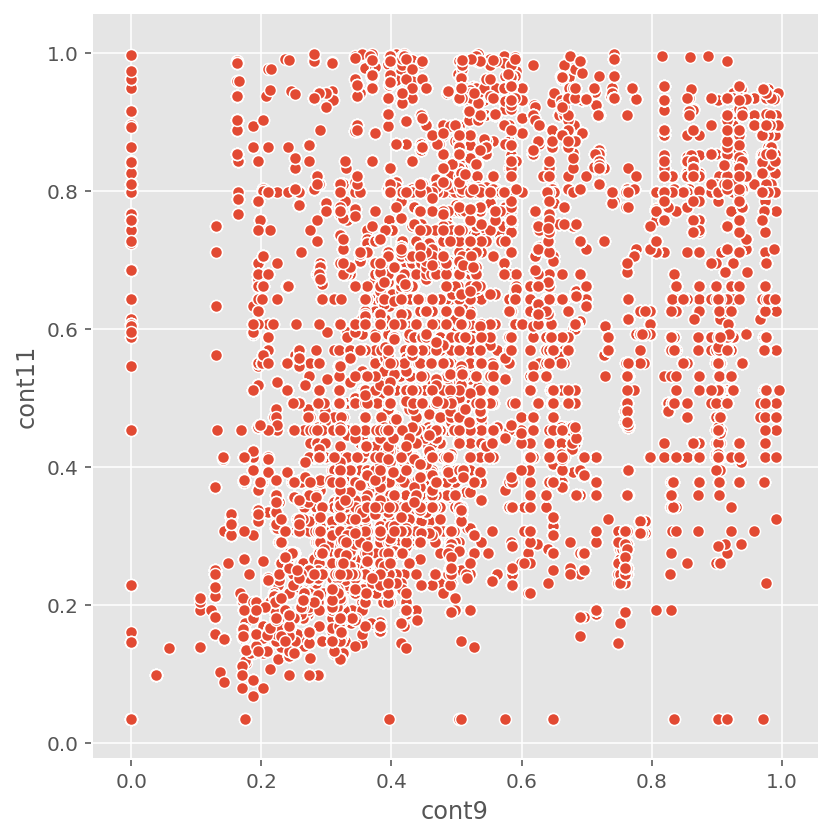

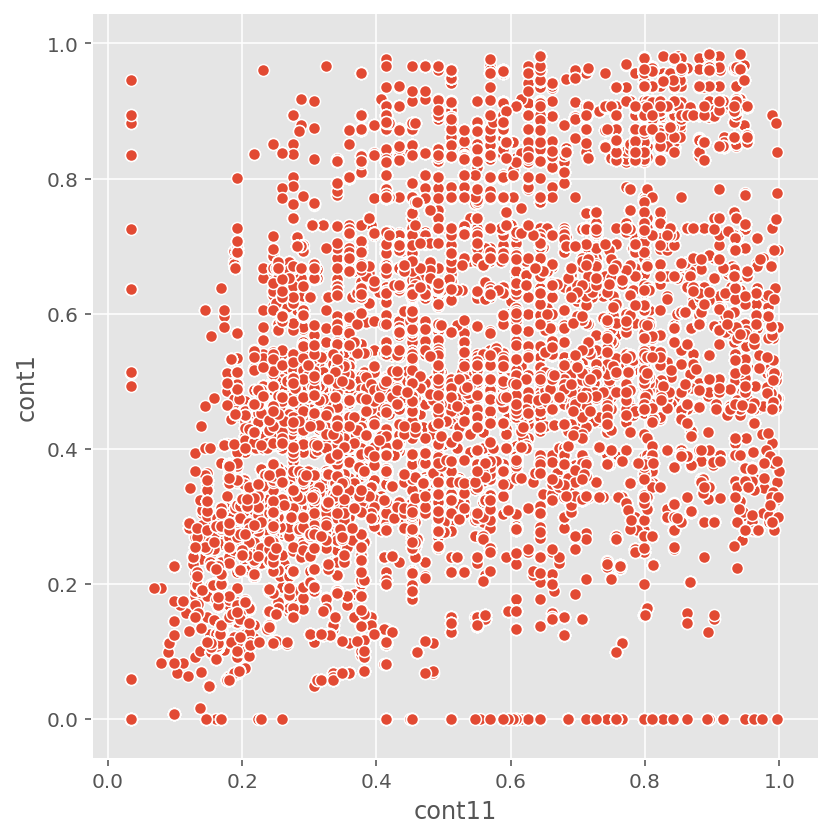

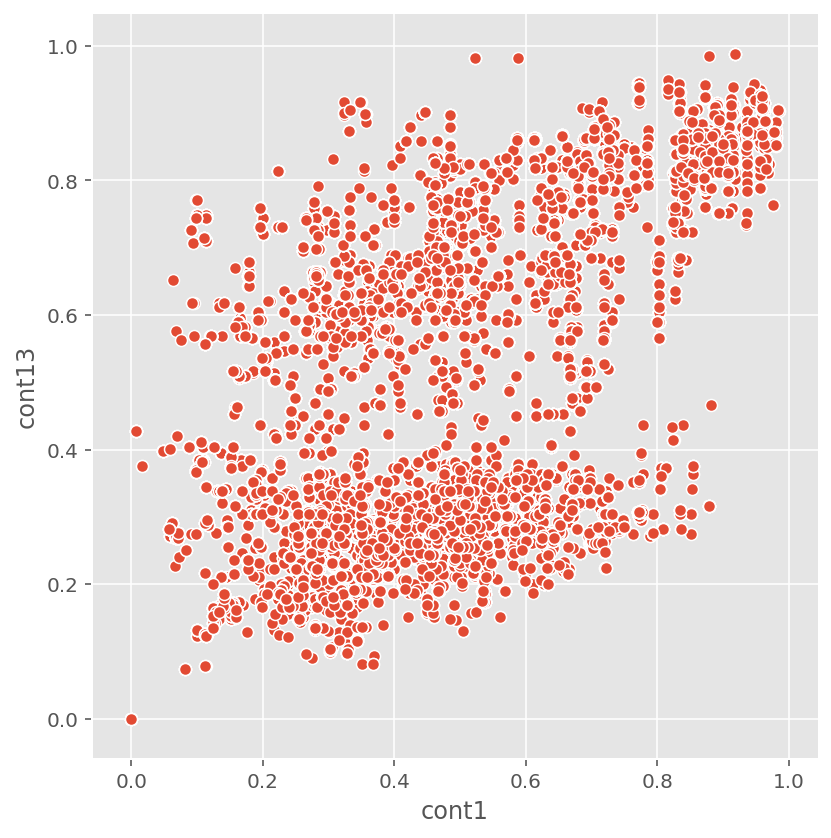

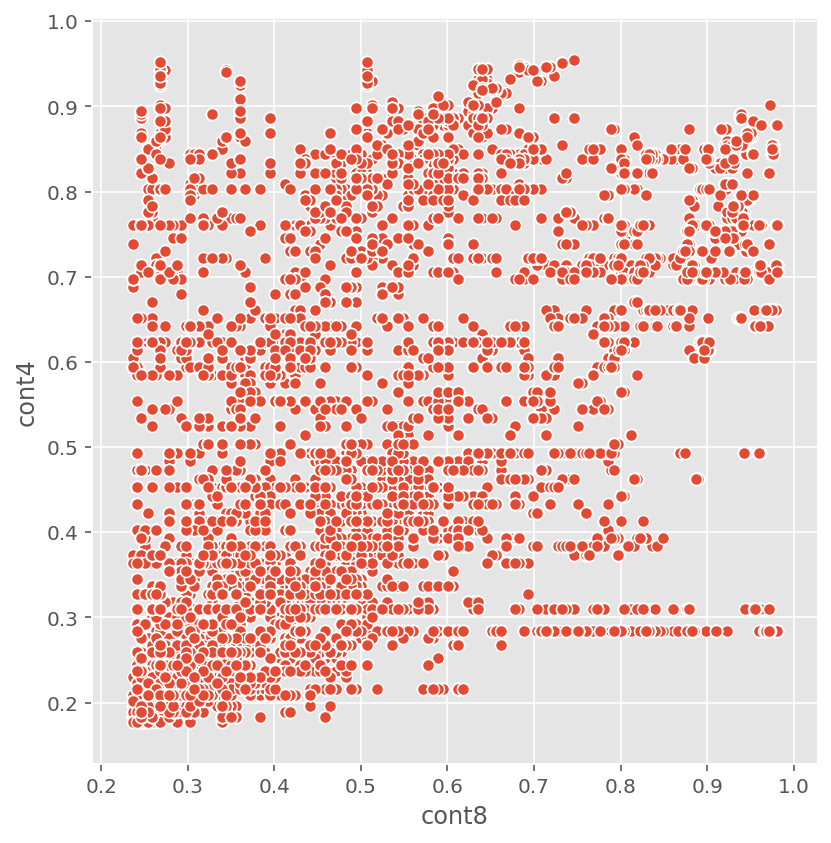

In [56]:
for c1,c2 in zip(df_corr_most['feature1'],
                 df_corr_most['feature2']):
    sns.pairplot(df_train_raw, size=6,
                 x_vars=c1,y_vars=c2 )
    
    #sns.regplot(data=df_train_raw,x=c1,y=c2 )
    plt.show()

# Continuous Variables

In [58]:
df_train_raw.skew().sort_values()

cont2    -0.310941
cont3    -0.010002
id       -0.002155
cont14    0.248674
cont11    0.280821
cont12    0.291992
cont10    0.355001
cont13    0.380742
cont4     0.416096
cont6     0.461214
cont1     0.516424
cont8     0.676634
cont5     0.681622
cont7     0.826053
cont9     1.072429
loss      3.794958
dtype: float64

In [62]:
cols_cont = [i for i in df_train_raw.columns
            if i.startswith('cont')]

print(len(cols_cont), cols_cont)

14 ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']


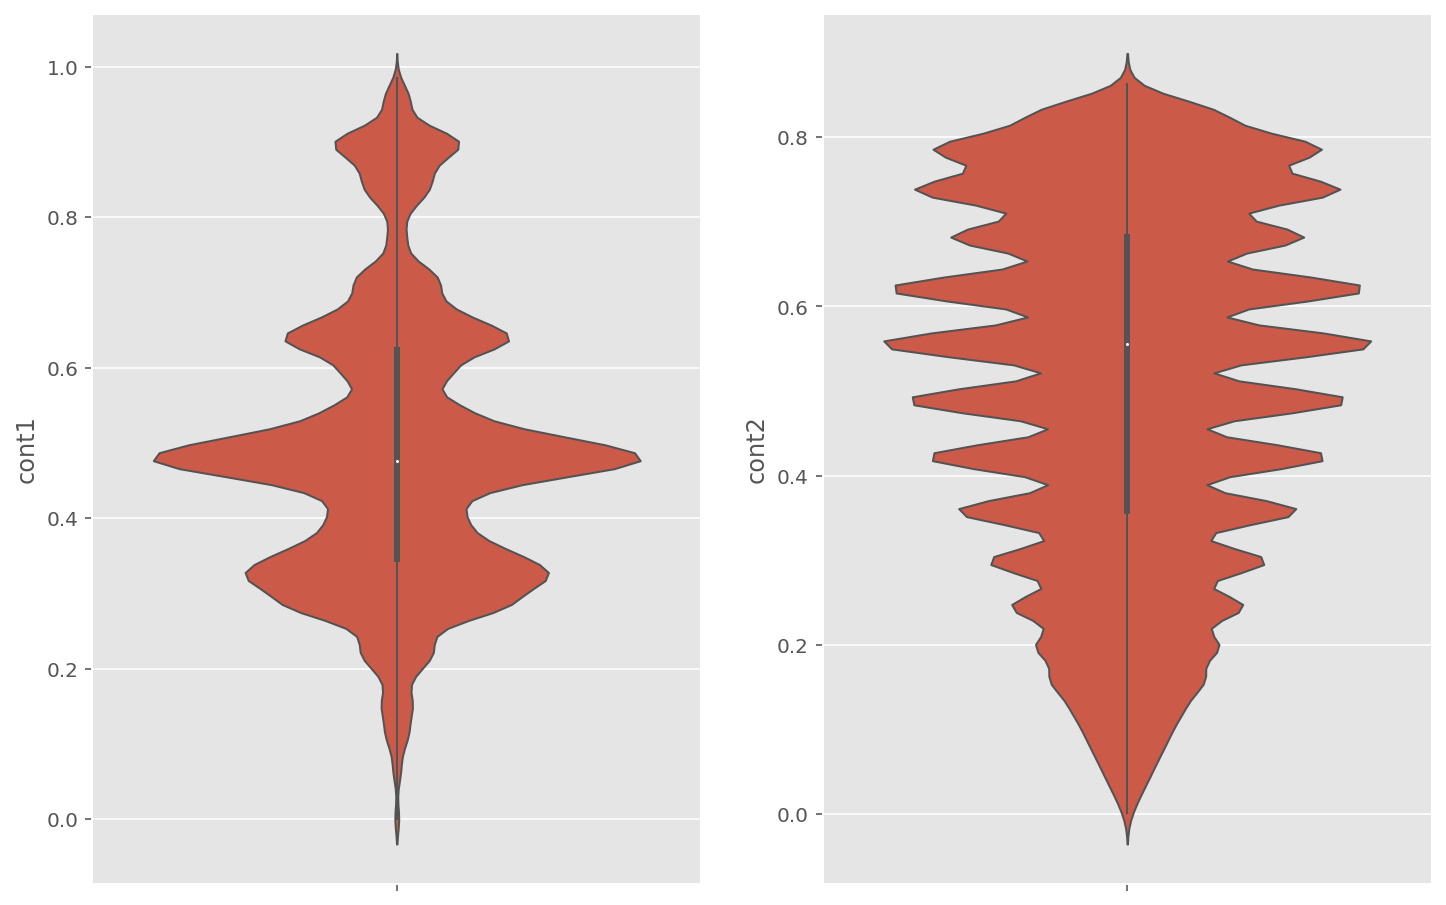

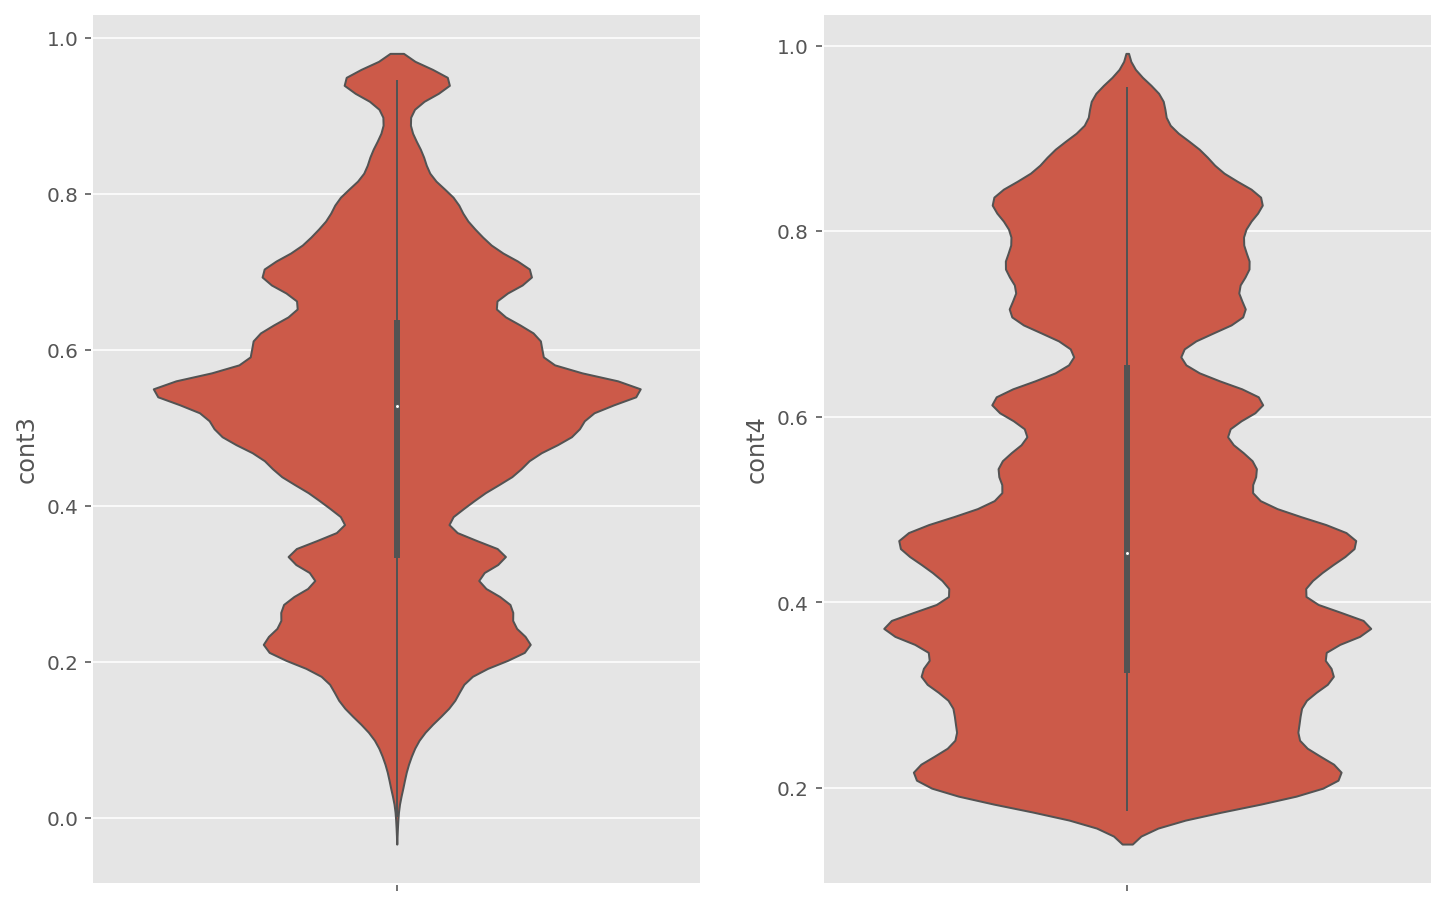

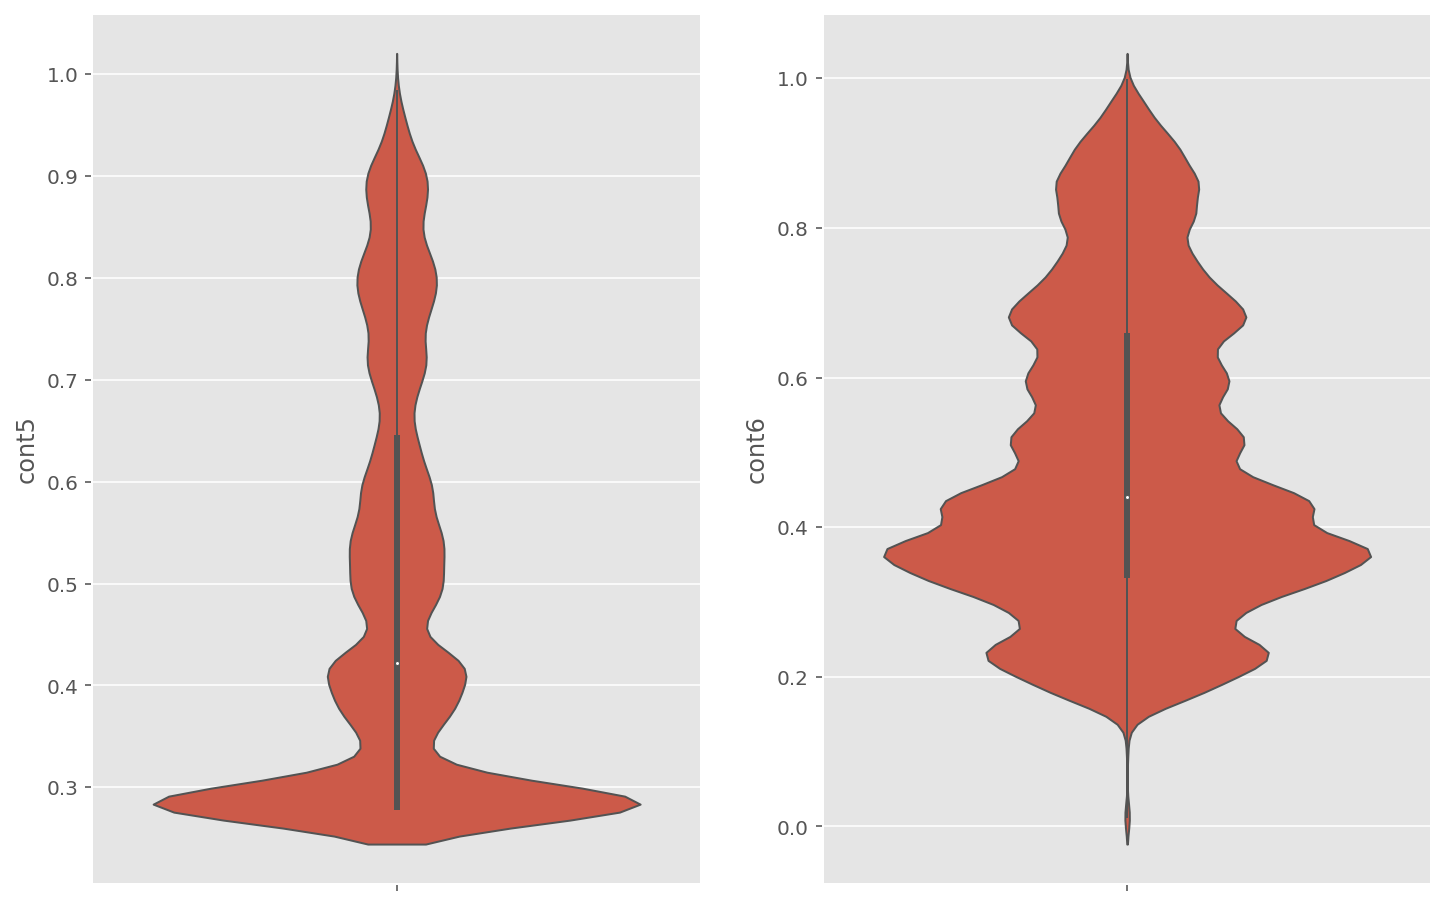

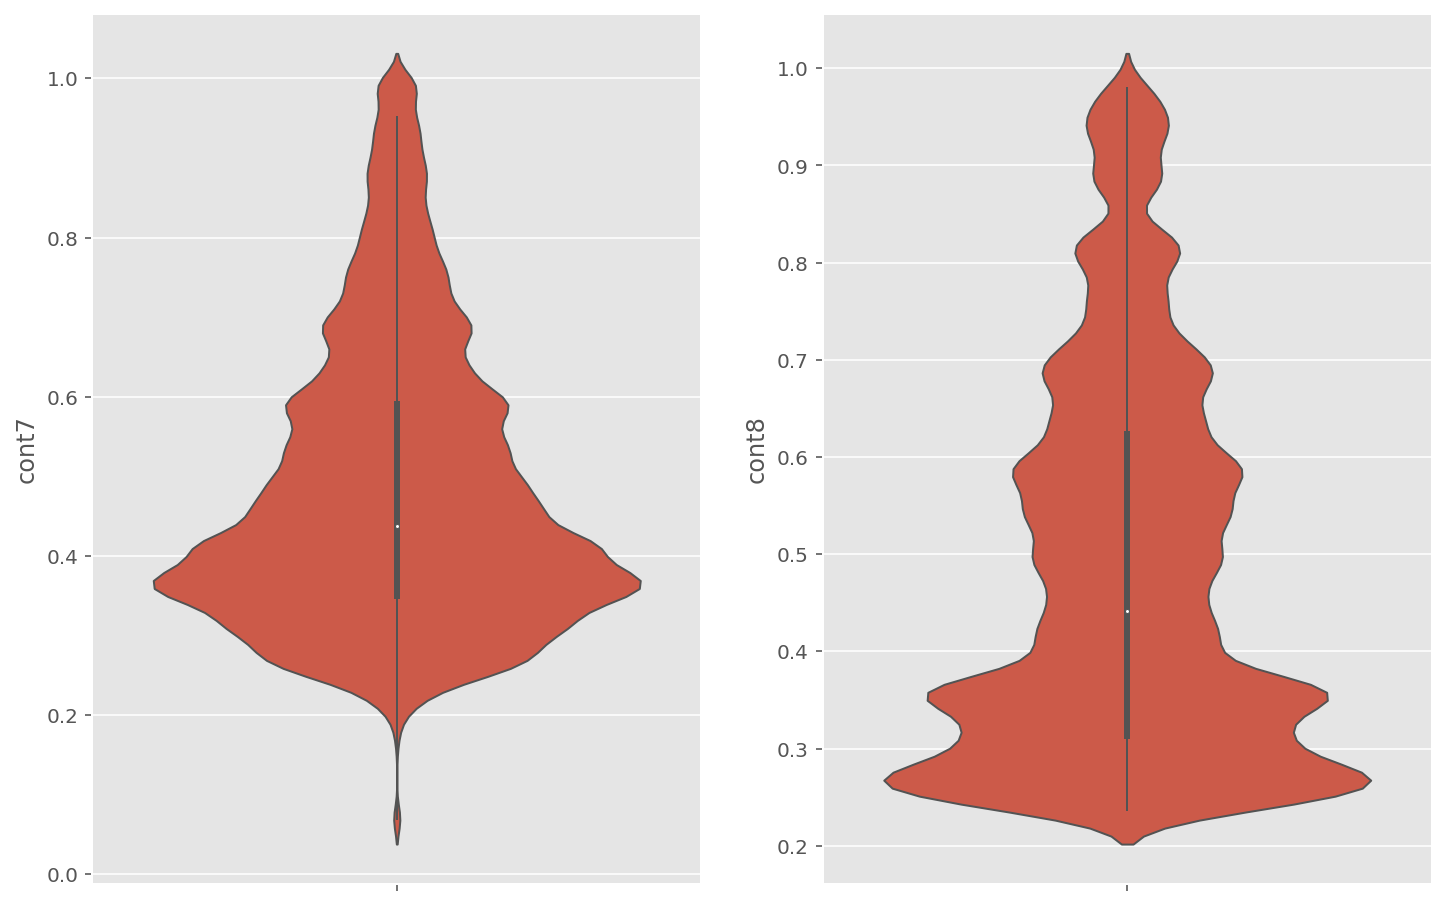

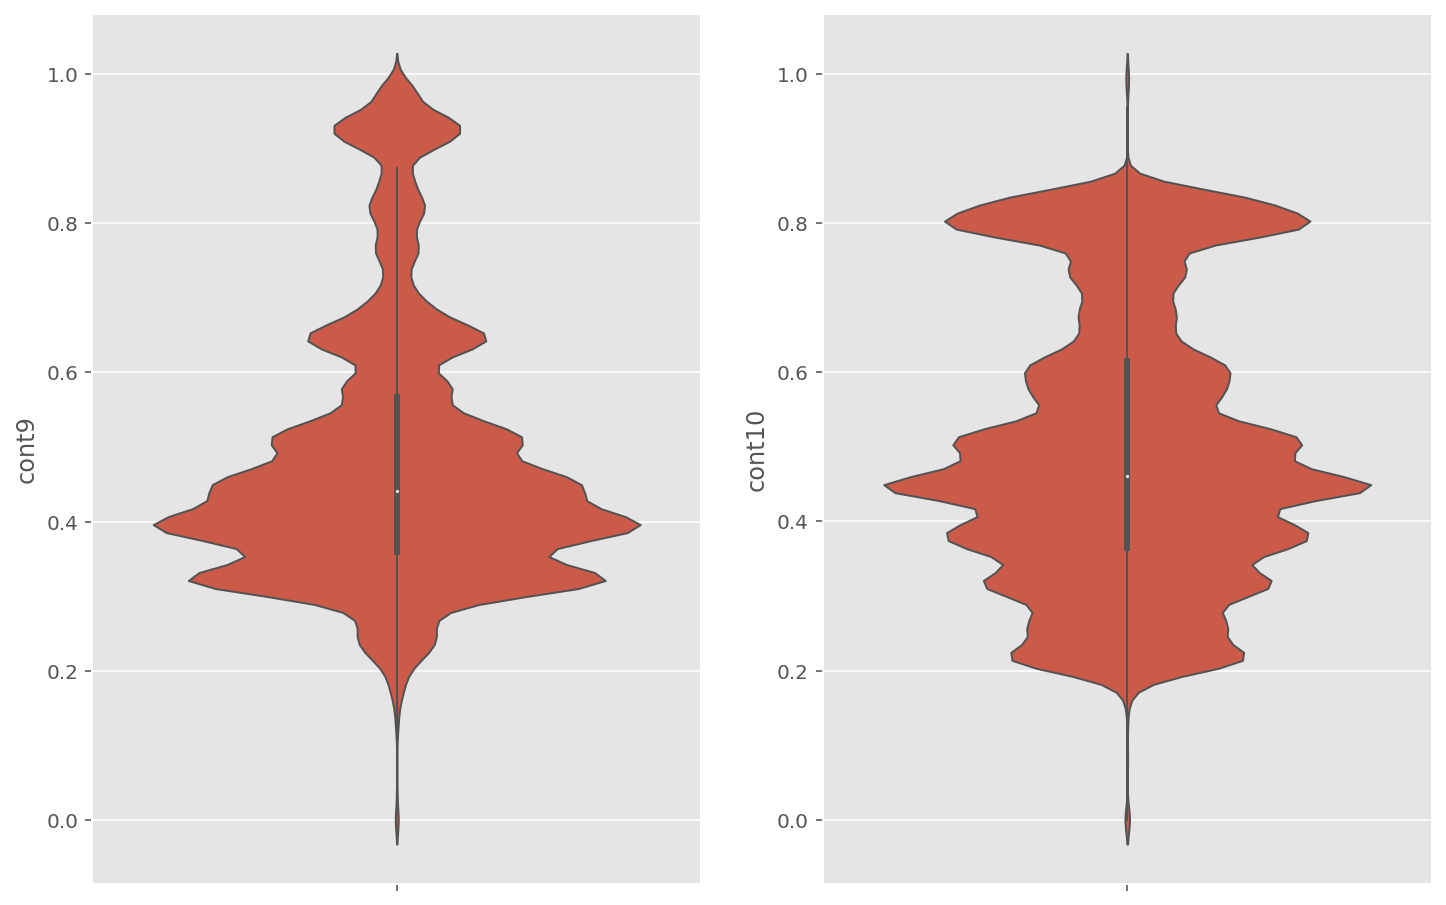

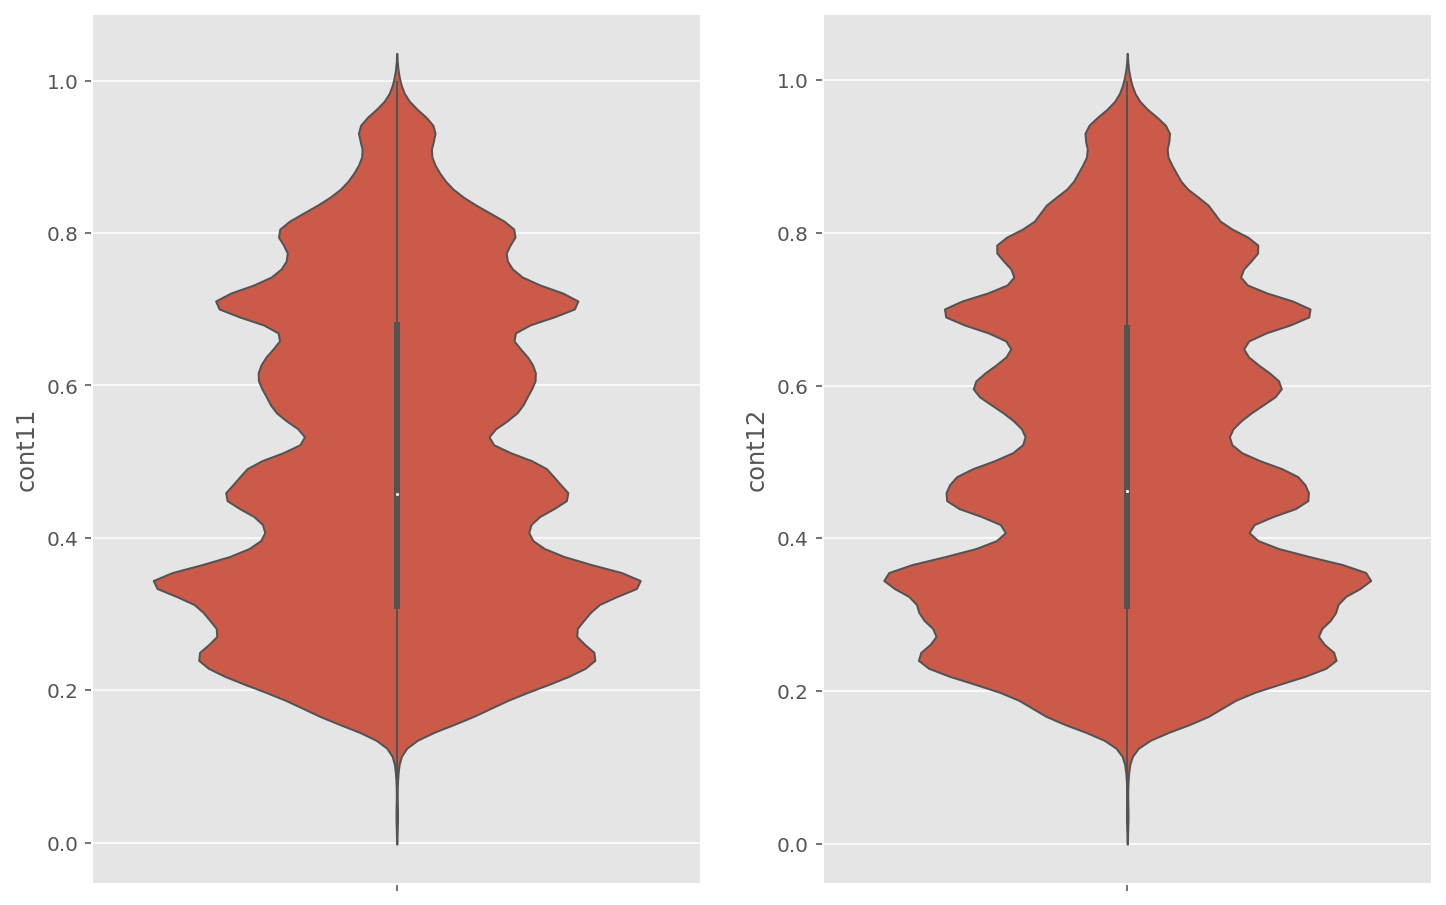

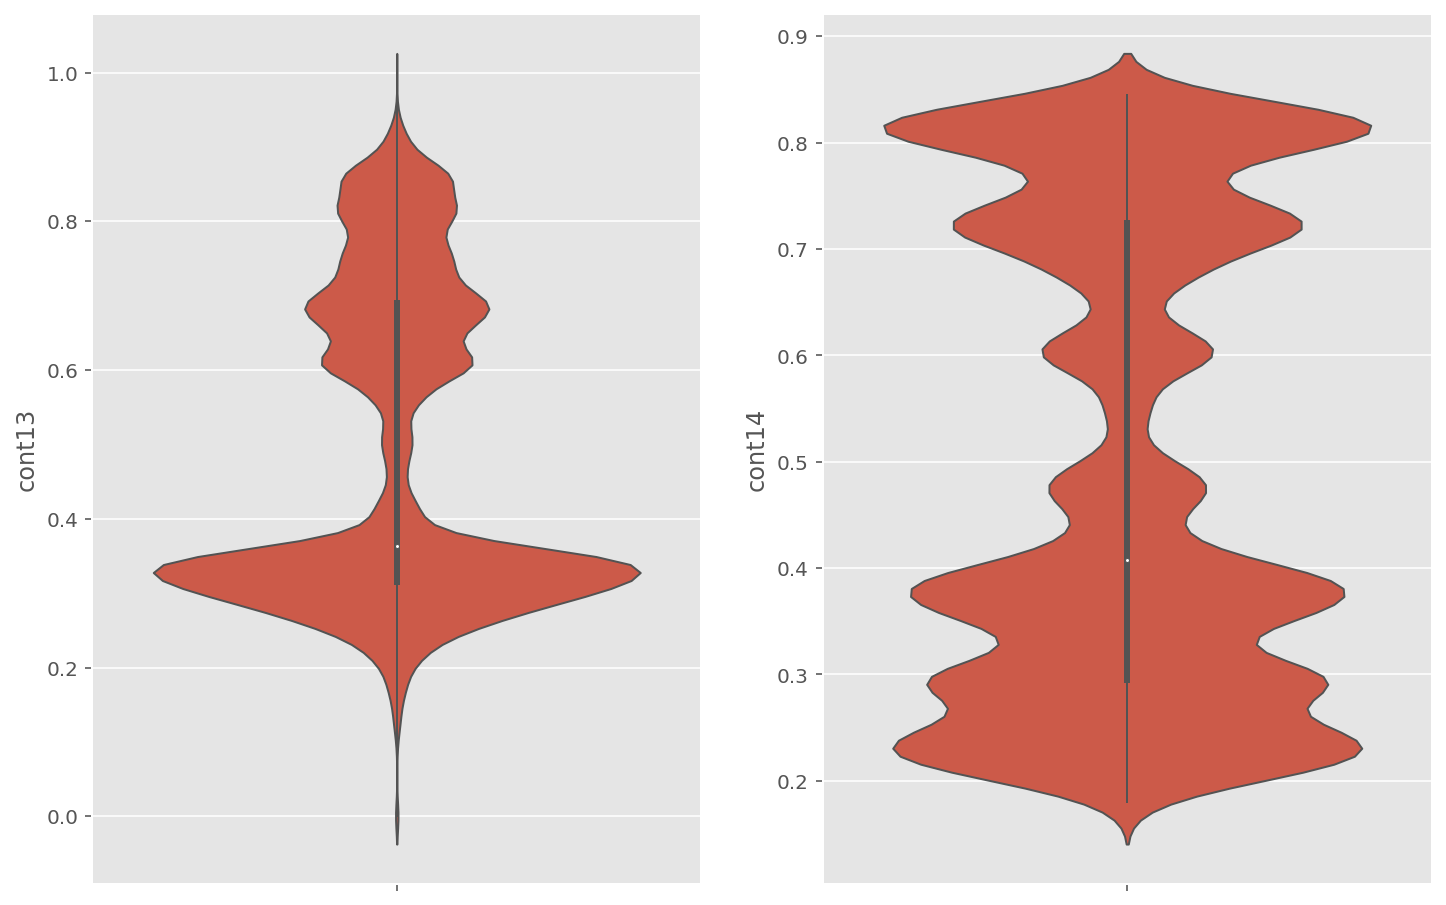

In [63]:
n_cols = 2
n_rows = len(cols_cont)//n_cols

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols_cont[i*n_cols+j],
                       data=df_train_raw,
                       ax=ax[j])